# **Análisis de riesgo**

El modelo de Markowitz también se denomina modelo de **media varianza** debido a que se basa en los rendimientos esperados (**media**) y la desviación estándar (**varianza**) de las diversas carteras.

Para elegir el mejor portafolio entre una cantidad de portafolios posibles, cada uno con diferente rentabilidad y riesgo, se deben tomar dos decisiones por separado:

1. Determinación de un conjunto de carteras eficientes.

2. Selección de la mejor cartera del conjunto eficiente.

# **0.- Instalación y configuración de uso de la plataforma**

In [ ]:
# Instalacion de la API de datos de Yahoo Finance
#!pip install yfinance

In [ ]:
# Cargar librerias que se usarán
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

# **1.- Obtención de los datos para el análisis**
Para realizar un análisis de una cartera de inversión se requiere tener acceso a una fuente de datos en la que podamos hacer la descarga para su posterior análisis.

In [ ]:
# @title Acciones
import numpy as np
import yfinance as yf
import pandas as pd

# Lista de tickers
tickers = [
    "LMT","TXN", "ADP","WM","PG","PEP"
]

# Fechas elegidas por el usuario
start_date = '2022-09-08'  # @param {type:"date"}
end_date   = 'c'  # @param {type:"date"}

# Descargar datos
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Calcular retornos diarios
returns = data.pct_change().dropna()

# Métricas anualizadas
mean_returns = returns.mean() * 252               # retorno anualizado
volatility = returns.std() * (252 ** 0.5)         # volatilidad anualizada
sharpe = mean_returns / volatility                # ratio Sharpe (simplificado)

# Crear tabla de métricas
metrics = pd.DataFrame({
    "Retorno Anualizado": mean_returns,
    "Volatilidad Anualizada": volatility,
    "Sharpe Ratio": sharpe
}).sort_values("Sharpe Ratio", ascending=False)

# Seleccionar las 5 mejores
top_5 = metrics.head(5)

print("📊 Top 5 acciones por Sharpe Ratio entre", start_date, "y", end_date)
print(top_5)


/tmp/ipython-input-1890275626.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  6 of 6 completed

📊 Top 5 acciones por Sharpe Ratio entre 2022-09-08 y 2025-09-08
        Retorno Anualizado  Volatilidad Anualizada  Sharpe Ratio
Ticker                                                          
WM                0.110458                0.180589      0.611653
PG                0.089234                0.165163      0.540278
ADP               0.107633                0.199430      0.539703
LMT               0.085013                0.219940      0.386530
TXN               0.117302                0.317189      0.369819


In [ ]:
#@title Selección de activos a invertir
#@markdown En la página de Yahoo Finance se pueden elegir los tickers para poder descargar sus precios.
ticker1 = 'WM' #@param {type:"string"}
ticker2 = 'PG' #@param {type:"string"}
ticker3 = 'ADP' #@param {type:"string"}
ticker4 = 'LMT' #@param {type:"string"}
ticker5 = 'TXN' #@param {type:"string"}


start_date = '2022-09-08' #@param {type:"date"}
end_date = '2025-09-08' #@param {type:"date"}

tk1 = yf.Ticker(ticker1)
tk2 = yf.Ticker(ticker2)
tk3 = yf.Ticker(ticker3)
tk4 = yf.Ticker(ticker4)
tk5 = yf.Ticker(ticker5)

price1 = tk1.history(start=start_date,end=end_date)
price2 = tk2.history(start=start_date,end=end_date)
price3 = tk3.history(start=start_date,end=end_date)
price4 = tk4.history(start=start_date,end=end_date)
price5 = tk5.history(start=start_date,end=end_date)


# Eliminar datos nulos si los hubiera
price1 = price1.dropna()
price2 = price2.dropna()
price3 = price3.dropna()
price4 = price4.dropna()
price5 = price5.dropna()

# Igualar la cantidad de datos para tener solo la cantidad minima de datos
min_data = np.min([np.shape(price1)[0],np.shape(price2)[0],np.shape(price3)[0]])
price1 = price1.iloc[0:min_data,:]
price2 = price2.iloc[0:min_data,:]
price3 = price3.iloc[0:min_data,:]
price4 = price4.iloc[0:min_data,:]
price5 = price5.iloc[0:min_data,:]

#%% definicion de funciones
def rendimientos(x):
    p = np.array(x)
    r = p[1:-1]/p[0:-2]-1
    return r

In [ ]:
# @title Revisando los datos que se lograron obtener para familiarizarse con ellos.
price2.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-08 00:00:00-04:00,126.121386,127.483776,125.246888,126.903839,7380500,0.0,0.0
2022-09-09 00:00:00-04:00,126.986677,129.877130,126.388340,128.836945,6434300,0.0,0.0
2022-09-12 00:00:00-04:00,128.330660,130.530719,128.054499,129.886353,5818700,0.0,0.0
2022-09-13 00:00:00-04:00,129.591786,130.190123,126.903849,127.198410,6350200,0.0,0.0
2022-09-14 00:00:00-04:00,127.640216,128.560743,126.728890,127.502129,6137800,0.0,0.0


Las gráficas son de mucha ayuda para poder ver lo que estamos acostumbrados y poder interpretar algunas caracteristicas de la serie de tiempo.

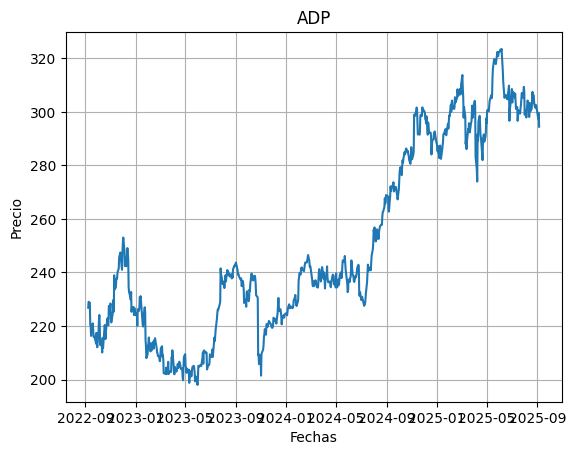

In [ ]:
import matplotlib.pyplot as plt
#@title Activo que se visualizará
activo =  'ticker3' #@param ["ticker1", "ticker2", "ticker3","ticker4","ticker5"]
if activo == 'ticker1':
  priceplot = price1
  text = ticker1
elif activo == 'ticker2':
  priceplot = price2
  text = ticker2
elif activo == 'ticker3':
  priceplot = price3
  text = ticker3
elif activo == 'ticker4':
  priceplot = price4
  text = ticker4
elif activo == 'ticker5':
  priceplot = price5
  text = ticker5

# Visualizar la evolucion de los precios
plt.plot(priceplot.index,priceplot.Close)
plt.title('%s'%(text))
plt.xlabel('Fechas'),plt.ylabel('Precio')
plt.grid()

# **2.- Estandarización de los datos**
Generalmente las series de tiempo de precios dependen de la valuación de cada una de las empresas y el tipo de moneda en el que se realiza está valuación. Por lo que es importante tener una forma de estandarizar los precios para poder hacer comparaciones entre los comportamientos de las empresas.

Una de las opciones para realizar esto, es calcular los rendimientos de los precios durante todo el periodo de estudio.

In [ ]:
#@title Obtención del rendimiento de las series de tiempo
r1 = rendimientos(price1.Close)
r2 = rendimientos(price2.Close)
r3 = rendimientos(price3.Close)
r4 = rendimientos(price4.Close)
r5 = rendimientos(price5.Close)

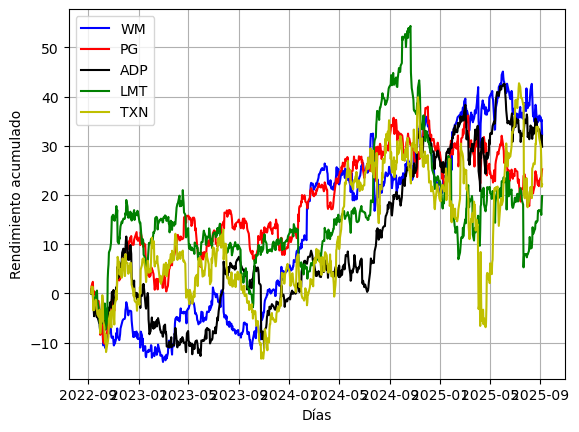

In [ ]:
#@title Visualizar el comportamiento en funcion de los rendimientos obtenidos.
plt.plot((price1.Close / price1.Close.iloc[0] - 1) * 100, 'b', label=ticker1)
plt.plot((price2.Close / price2.Close.iloc[0] - 1) * 100, 'r', label=ticker2)
plt.plot((price3.Close / price3.Close.iloc[0] - 1) * 100, 'k', label=ticker3)
plt.plot((price4.Close / price4.Close.iloc[0] - 1) * 100, 'g', label=ticker4)
plt.plot((price5.Close / price5.Close.iloc[0] - 1) * 100, 'y', label=ticker5)

plt.legend((ticker1, ticker2, ticker3, ticker4, ticker5))
plt.xlabel('Días')
plt.ylabel('Rendimiento acumulado')
plt.grid()
plt.show()

# **3.- Descripción estadística**
El redimiento promedio se considera como un factor que nos marca el redimiento esperado en el periodo de estudio. El riesgo de invertir en un determinado activo está relacionado con la variabilidad de los precios en el periodo, lo cual se peude medir por medio de la varianza.

Rendimiento diario esperado: 0.035%, Riesgo: 1.040%


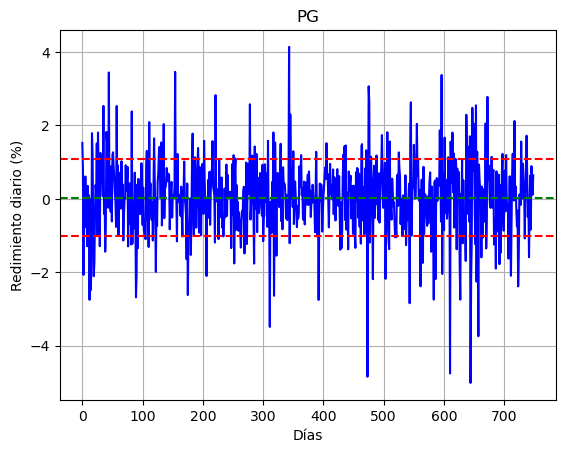

In [ ]:
#@title Número del activo que se visualizará
activo =  'ticker2' #@param ["ticker1", "ticker2", "ticker3","ticker4","ticker5"]
if activo == 'ticker1':
  r = r1
  text = ticker1
elif activo == 'ticker2':
  r = r2
  text = ticker2
elif activo == 'ticker3':
  r = r3
  text = ticker3
elif activo == 'ticker4':
  r = r4
  text = ticker4
elif activo == 'ticker5':
  r = r5
  text = ticker5
plt.plot(r*100,'b')
plt.axhline(y=np.mean(r)*100,color='g', linestyle='--')
plt.axhline(y=(np.mean(r)+np.std(r))*100,color='r', linestyle='--')
plt.axhline(y=(np.mean(r)-np.std(r))*100,color='r', linestyle='--')
plt.title(text)
plt.xlabel('Días'),plt.ylabel('Redimiento diario (%)')
plt.grid()
print('Rendimiento diario esperado: %0.3f%%, Riesgo: %0.3f%%'%(np.mean(r)*100,np.std(r)*100))

In [ ]:
#@title Rendimientos y riesgos anualizados

# Número de días de trading en un año
dias_trading = 252

# Anualización de los rendimientos y riesgos
resumen_anualizado = pd.DataFrame(index=['Rend Anualizado (%)', 'Riesgo Anualizado (%)'])
resumen_anualizado[ticker1] = [np.mean(r1) * 100 * dias_trading, np.std(r1) * 100 * np.sqrt(dias_trading)]
resumen_anualizado[ticker2] = [np.mean(r2) * 100 * dias_trading, np.std(r2) * 100 * np.sqrt(dias_trading)]
resumen_anualizado[ticker3] = [np.mean(r3) * 100 * dias_trading, np.std(r3) * 100 * np.sqrt(dias_trading)]
resumen_anualizado[ticker4] = [np.mean(r4) * 100 * dias_trading, np.std(r4) * 100 * np.sqrt(dias_trading)]
resumen_anualizado[ticker5] = [np.mean(r5) * 100 * dias_trading, np.std(r5) * 100 * np.sqrt(dias_trading)]

# Mostrar el resumen anualizado
resumen_anualizado


,WM,PG,ADP,LMT,TXN
Rend Anualizado (%),11.791925,8.759858,11.360786,7.993488,11.630914
Riesgo Anualizado (%),18.013006,16.513855,19.916355,21.976542,31.718393


# **4.- Construcción de un portafolio**

In [ ]:
#@title Ponderaciones de inversión
x1 =  .1  # @param {type:"number"}
x2 =  0.6  # @param {type:"number"}
x3 =  0.05  # @param {type:"number"}
x4 =  0.2  # @param {type:"number"}

Rs = np.zeros((np.shape(r1)[0], 5))
Rs[:, 0] = r1
Rs[:, 1] = r2
Rs[:, 2] = r3
Rs[:, 3] = r4
Rs[:, 4] = r5

covar = np.cov(Rs.T)

# Rendimientos esperados de cada activo
R = np.zeros((1, 5))
R[:, 0] = np.mean(r1)
R[:, 1] = np.mean(r2)
R[:, 2] = np.mean(r3)
R[:, 3] = np.mean(r4)
R[:, 4] = np.mean(r5)

# Ponderación del portafolio
X = np.zeros((1, 5))
X[0, :] = [x1, x2, x3, x4, 1 - x1 - x2 - x3 - x4]

# Rendimiento del portafolio
Rend_p = np.dot(X, R.T)

# Riesgo del portafolio
Risk_p = np.sqrt(np.dot(np.dot(X, covar), np.transpose(X)))

num_dias = 252

# Rendimiento anualizado del portafolio
Rend_anualizado = (1 + Rend_p[0][0]) ** num_dias - 1

# Riesgo anualizado del portafolio
Risk_anualizado = Risk_p[0][0] * (num_dias ** 0.5)

# Resumen del portafolio
print('\nRESUMEN DE PORTFOLIO (ANUALIZADO)')
print(f'Capital Invertido: {100 * x1:.1f} % en {ticker1}, {100 * x2:.1f} % en {ticker2}, {100 * x3:.1f} % en {ticker3}, {100 * x4:.1f} % en {ticker4}, {100 * (1 - x1 - x2 - x3 - x4):.1f} % en {ticker5}')
print(f'Rendimiento Portafolio Anualizado: {Rend_anualizado * 100:.3f} %')
print(f'Riesgo Portafolio Anualizado: {Risk_anualizado * 100:.3f} %')


RESUMEN DE PORTFOLIO (ANUALIZADO)
Capital Invertido: 10.0 % en WM, 60.0 % en PG, 5.0 % en ADP, 20.0 % en LMT, 5.0 % en TXN
Rendimiento Portafolio Anualizado: 9.616 %
Riesgo Portafolio Anualizado: 13.558 %


# **5.- ¿Cómo busco el mejor portafolio?**
Para responder está pregunta se debe de tener en cuenta que se cuenta con un número grande de posibilidades para armar el portafolio.

Una manera es simular un gran número de portafolios para obtener sus rendimientos y riesgos. Después hacer el análisis de los portafolios encontrados para tomar una decisión.

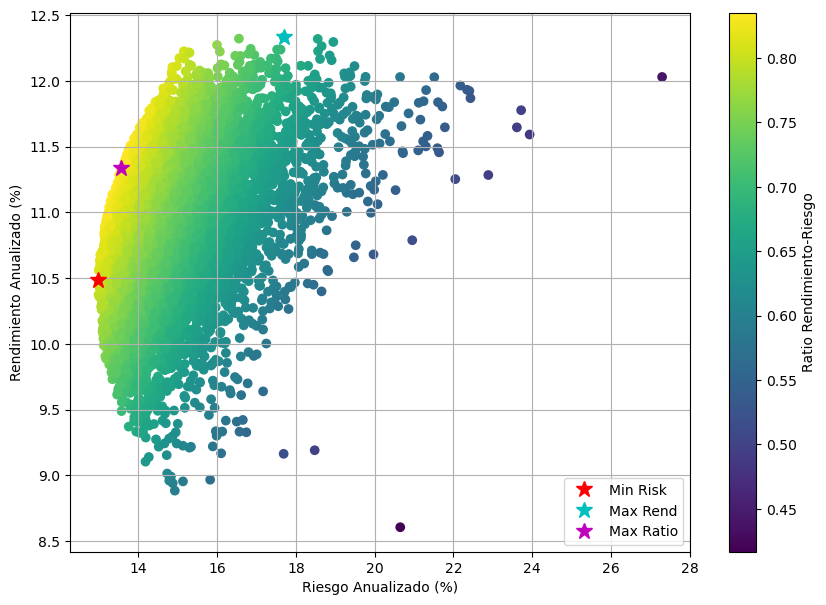


RESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)
Rendimiento anual: 10.484 %; Riesgo anual: 12.989 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.27948117 0.34750119 0.12321893 0.18503896 0.06475976]

RESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)
Rendimiento anual: 12.333 %; Riesgo anual: 17.694 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.44789351 0.00581001 0.15773138 0.00310868 0.38545642]

RESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)
Rendimiento anual: 11.335 %; Riesgo anual: 13.572 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.43898339 0.21771737 0.19986314 0.07785009 0.06558601]


In [ ]:
# @title Simulaciones del portafolio requeridas
n_simulaciones = 10000 # @param {type:"integer"}

tickers=[ticker1, ticker2, ticker3,ticker4,ticker5]

# Inicializamos las simulaciones
X = np.random.rand(n_simulaciones, 5)
X = X / X.sum(axis=1)[:, None]  # normalizamos filas para que los pesos sumen 1

Rend_p = np.zeros((n_simulaciones, 1))
Risk_p = np.zeros((n_simulaciones, 1))

# Simulaciones de rendimientos y riesgos
for k in range(n_simulaciones):
    Rend_p[k, :] = np.dot(X[k, :], R.T)  # Rendimiento esperado (promedio diario)
    Risk_p[k, :] = np.sqrt(np.dot(np.dot(X[k, :], covar), X[k, :].T))  # Riesgo (desv. estándar)

# Crear el DataFrame de los portafolios
Portfolios = pd.DataFrame()
Portfolios[ticker1] = X[:, 0]
Portfolios[ticker2] = X[:, 1]
Portfolios[ticker3] = X[:, 2]
Portfolios[ticker4] = X[:, 3]
Portfolios[ticker5] = X[:, 4]

Portfolios['Rend'] = Rend_p
Portfolios['Risk'] = Risk_p

# Anualización de rendimientos y riesgos
Portfolios['Rend_Anual'] = (1 + Portfolios['Rend'])**252 - 1
Portfolios['Risk_Anual'] = Portfolios['Risk'] * np.sqrt(252)

# Identificar los portafolios clave
idx_min = np.argmin(Portfolios['Risk_Anual'])  # Menor riesgo anualizado
idx_max = np.argmax(Portfolios['Rend_Anual'])  # Mayor rendimiento anualizado
ratio = Portfolios['Rend_Anual'] / Portfolios['Risk_Anual']
idx_max_ratio = np.argmax(ratio)  # Mejor ratio

# Filtrar portafolios con rendimiento positivo y encontrar el de menor riesgo
tmp = Portfolios[Portfolios['Rend_Anual'] > 0]
idx_min_pos = tmp.index[np.argmin(tmp['Risk_Anual'])]
idx_max_pos = tmp.index[np.argmax(tmp['Rend_Anual'])]
idx_max_ratio_pos = tmp.index[np.argmax(ratio[tmp.index])]

# Visualización de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(Portfolios['Risk_Anual'] * 100, Portfolios['Rend_Anual'] * 100, c=ratio, cmap='viridis')
plt.colorbar(label='Ratio Rendimiento-Riesgo')

# Marcar los portafolios óptimos
plt.plot(Portfolios['Risk_Anual'][idx_min] * 100, Portfolios['Rend_Anual'][idx_min] * 100, 'r*', markersize=12, label='Min Risk')
plt.plot(Portfolios['Risk_Anual'][idx_max] * 100, Portfolios['Rend_Anual'][idx_max] * 100, 'c*', markersize=12, label='Max Rend')
plt.plot(Portfolios['Risk_Anual'][idx_max_ratio] * 100, Portfolios['Rend_Anual'][idx_max_ratio] * 100, 'm*', markersize=12, label='Max Ratio')

plt.xlabel('Riesgo Anualizado (%)')
plt.ylabel('Rendimiento Anualizado (%)')
plt.legend()
plt.grid()
plt.show()

# Resumen anualizado
print('\nRESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_min] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_min] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_min, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max_ratio] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max_ratio] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max_ratio, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos


# **CAPM y Beta**
**Tasa libre de riesgo:** CETES a 12 meses (7.83%)

**Rendimiento anual del mercado:** 8.3656%

In [ ]:
# @title Cálculo
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression

# Parámetros
tickers = [ticker1, ticker2, ticker3, ticker4, ticker5]  # Activos del portafolio
market_index = '^GSPC'  # Índice de referencia (SP&500)
start_date = '2022-09-08' #@param {type:"date"}
end_date = '2025-09-08' #@param {type:"date"}

# Pesos del portafolio (ajusta según tu portafolio real)
weights = Portfolios.iloc[idx_max_ratio, :5].values

# Descargar datos de Yahoo Finance
data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']

# Calcular rendimientos diarios sin relleno automático
returns = data.pct_change(fill_method=None).dropna()

# Regresión para estimar la beta de cada activo
betas = []
for stock in tickers:
    X = returns[[market_index]]  # Retorno del mercado
    y = returns[[stock]]  # Retorno del activo

    model = LinearRegression().fit(X, y)  # Modelo de regresión lineal
    beta = model.coef_[0][0]  # Coeficiente beta
    betas.append(beta)

# Beta del portafolio (promedio ponderado de las betas individuales)
portfolio_beta = np.dot(weights, betas)

# CAPM del portafolio
rf = 7.83 / 100  # Tasa libre de riesgo (Euribor 1 año)
market_expected_return = 8.3656 / 100  # Rendimiento esperado del mercado

capm_portfolio = rf + portfolio_beta * (market_expected_return - rf)

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    'Stock': tickers + ['PORTAFOLIO'],
    'Beta': betas + [portfolio_beta],
    'CAPM (%)': [rf + b * (market_expected_return - rf) for b in betas] + [capm_portfolio]
})

# Convertir CAPM a porcentaje
df_resultados['CAPM (%)'] = df_resultados['CAPM (%)'] * 100

# Mostrar el DataFrame
df_resultados


C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1508451139.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']
[*********************100%***********************]  6 of 6 completed


,Stock,Beta,CAPM (%)
0,WM,0.346935,8.015818
1,PG,0.285149,7.982726
2,ADP,0.701751,8.205858
3,LMT,0.250315,7.964069
4,TXN,1.290940,8.521428
5,PORTAFOLIO,0.458789,8.075728


## **Ratio de Sortino**

El Ratio de Sortino mide la rentabilidad de una inversión en relación con el riesgo de caídas (downside risk), es decir, solo considera la volatilidad negativa (cuando los rendimientos están por debajo de un nivel mínimo deseado o "tasa libre de riesgo").

In [ ]:
# @title Sortino

# Tasa libre de riesgo anualizada (CETES 1 año)
rf = 0.0783

# Inicializamos las simulaciones
X = np.random.rand(n_simulaciones, 5)
X = X / X.sum(axis=1)[:, None]  # normalizar filas (pesos)

Rend_p = np.zeros((n_simulaciones, 1))
Risk_p = np.zeros((n_simulaciones, 1))

# Simulaciones de rendimientos y riesgos
for k in range(n_simulaciones):
    Rend_p[k, :] = np.dot(X[k, :], R.T)  # Rendimiento esperado (promedio diario)
    Risk_p[k, :] = np.sqrt(np.dot(np.dot(X[k, :], covar), X[k, :].T))  # Riesgo

# Función para calcular downside deviation (anualizada)
def downside_deviation(returns, mar=rf/252):  # rf/252 -> tasa diaria
    downside_returns = np.minimum(returns - mar, 0)
    return np.sqrt((downside_returns**2).mean()) * np.sqrt(252)  # anualizado

# Calcular rendimientos diarios de cada portafolio simulado
daily_returns = returns[tickers]  # rendimientos diarios de activos
portfolios_daily_returns = np.dot(daily_returns.values, X.T)  # (días x portafolios)

# Calcular downside deviation para cada portafolio
downsides = np.array([downside_deviation(portfolios_daily_returns[:, i]) for i in range(n_simulaciones)])

# Sortino ratio para cada portafolio
Portfolios['Sortino'] = (Portfolios['Rend_Anual'] - rf) / downsides

# Identificar portafolio con mejor Sortino
idx_max_sortino = np.argmax(Portfolios['Sortino'])

df_sortino = Portfolios.copy()
# Convertimos rendimientos y riesgos a porcentajes
df_sortino['Rend_Anual (%)'] = df_sortino['Rend_Anual'] * 100
df_sortino['Risk_Anual (%)'] = df_sortino['Risk_Anual'] * 100
# Ordenamos por Sortino (de mayor a menor)
df_sortino = df_sortino.sort_values(by='Sortino', ascending=False)
# Seleccionamos columnas clave para mostrar
cols_to_show = tickers + ['Rend_Anual (%)', 'Risk_Anual (%)', 'Sortino']
df_sortino = df_sortino[cols_to_show]
# Mostramos los 5 mejores portafolios
print("\n📊 TOP 5 PORTAFOLIOS POR RATIO DE SORTINO")
df_sortino.head(5)



📊 TOP 5 PORTAFOLIOS POR RATIO DE SORTINO


,WM,PG,ADP,LMT,TXN,Rend_Anual (%),Risk_Anual (%),Sortino
8841,0.509883,0.009324,0.021430,0.016352,0.443011,12.320134,18.555286,0.478541
2617,0.354605,0.019254,0.319275,0.011206,0.295661,12.190822,16.594787,0.466160
8943,0.274652,0.013716,0.457043,0.012744,0.241845,12.146218,16.569942,0.456720
1625,0.582705,0.033571,0.129154,0.003743,0.250828,12.273975,15.998474,0.455688
8847,0.289460,0.024245,0.206662,0.020825,0.458808,12.157869,18.907200,0.453846


C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\831828075.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(activos, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


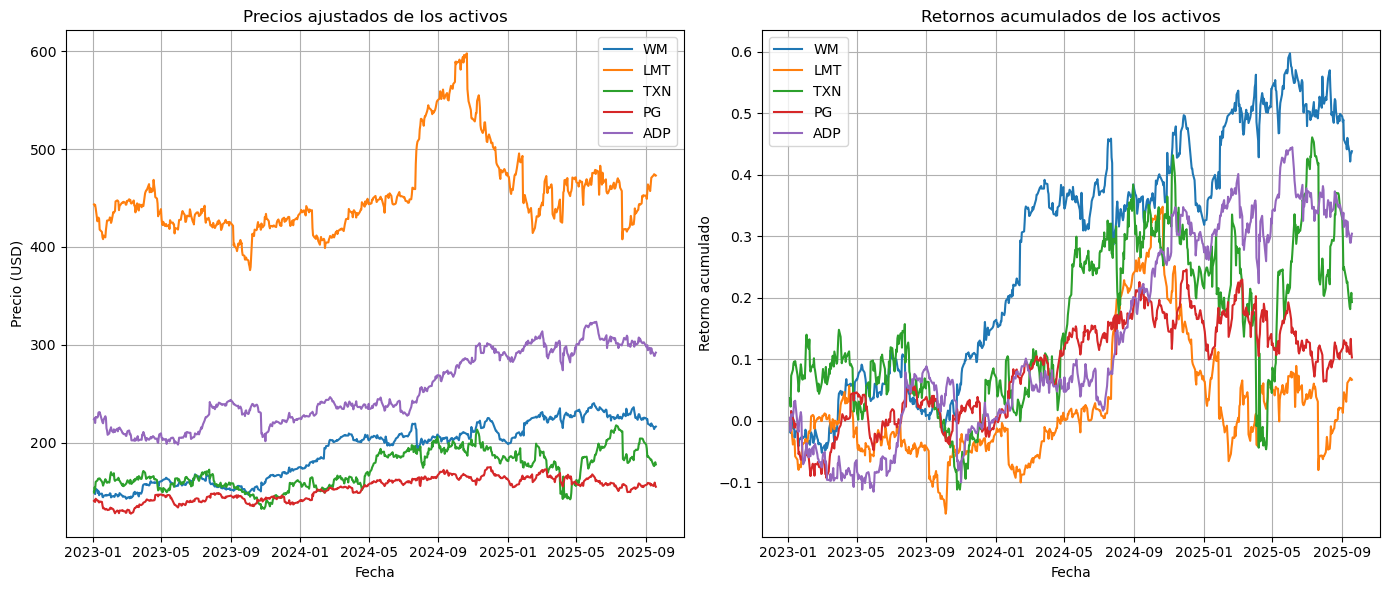

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Parámetros
# -----------------------------
activos = ["WM", "LMT", "TXN", "PG", "ADP"]
start_date = "2023-01-01"
end_date = "2025-09-20"

# -----------------------------
# Descargar datos
# -----------------------------
data = yf.download(activos, start=start_date, end=end_date)['Close']

# -----------------------------
# Calcular retornos acumulados
# -----------------------------
retornos = data.pct_change().dropna()
ret_acumulados = (1 + retornos).cumprod() - 1

# -----------------------------
# Graficar
# -----------------------------
plt.figure(figsize=(14,6))

# Gráfico de precios
plt.subplot(1,2,1)
for activo in activos:
    plt.plot(data.index, data[activo], label=activo)
plt.title("Precios ajustados de los activos")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)

# Gráfico de retornos acumulados
plt.subplot(1,2,2)
for activo in activos:
    plt.plot(ret_acumulados.index, ret_acumulados[activo], label=activo)
plt.title("Retornos acumulados de los activos")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Análisis de series temporales de precios y retornos por activo y para el portafolio

# Rupturas y eventos de cola

In [ ]:
pip install yfinance pandas numpy matplotlib ruptures scipy openpyxl


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install ruptures


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Descargando precios ajustados de Yahoo Finance…

WM — Detección de rupturas en retornos diarios

Breakpoints detectados (PELT-RBF): 2
Fechas de ruptura: 2021-10-20, 2022-11-15

— Métricas por segmento (anualizado desde retornos diarios) —
 Segmento     Inicio        Fin   N  Media_diaria  Vol_diaria  Media_anualizada_%  Vol_anualizada_%
        1 2021-01-05 2021-10-19 200      0.001730    0.009405           43.601148         14.930699
        2 2021-10-20 2022-11-14 270      0.000124    0.013795            3.114826         21.898544
        3 2022-11-15 2025-11-07 748      0.000456    0.011163           11.495065         17.720792

— Evidencia estadística en cada ruptura (frontera) —
Ruptura_en  t(Welch)      p_t  W(Levene)  p_levene  ΔMedia_diaria  ΔVol_diaria  N_antes  N_despues  sig_media(p<0.05)  sig_var(p<0.05)
2021-10-20  1.500046 0.134281  25.331415  0.000001      -0.001607     0.004389      200        270              False             True
2022-11-15 -0.356244 0.721844  27.030

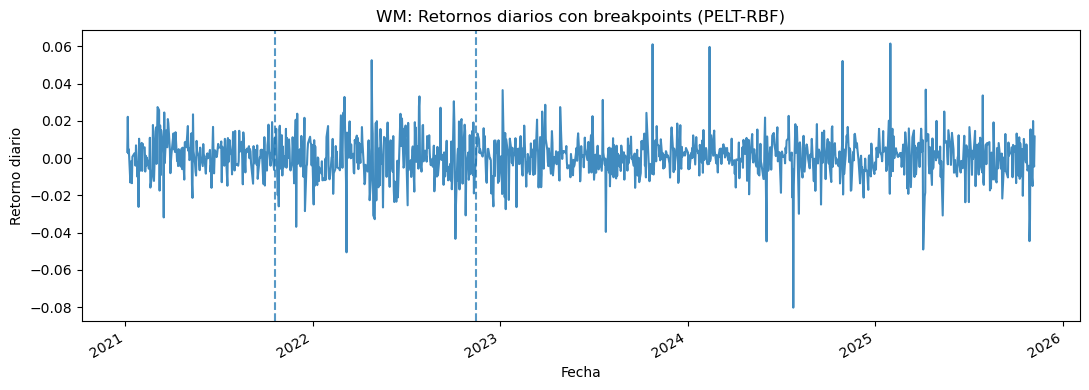


PG — Detección de rupturas en retornos diarios

Breakpoints detectados (PELT-RBF): 2
Fechas de ruptura: 2022-02-22, 2022-11-08

— Métricas por segmento (anualizado desde retornos diarios) —
 Segmento     Inicio        Fin   N  Media_diaria  Vol_diaria  Media_anualizada_%  Vol_anualizada_%
        1 2021-01-05 2022-02-18 285      0.000670    0.009253           16.892741         14.688867
        2 2022-02-22 2022-11-07 180     -0.000659    0.015069          -16.598813         23.921255
        3 2022-11-08 2025-11-07 753      0.000251    0.010186            6.319588         16.170229

— Evidencia estadística en cada ruptura (frontera) —
Ruptura_en  t(Welch)      p_t  W(Levene)  p_levene  ΔMedia_diaria  ΔVol_diaria  N_antes  N_despues  sig_media(p<0.05)  sig_var(p<0.05)
2022-02-22  1.063413 0.288563  38.342515  0.000000      -0.001329     0.005816      285        180              False             True
2022-11-08 -0.768822 0.442825  42.352939  0.000000       0.000909    -0.004883      1

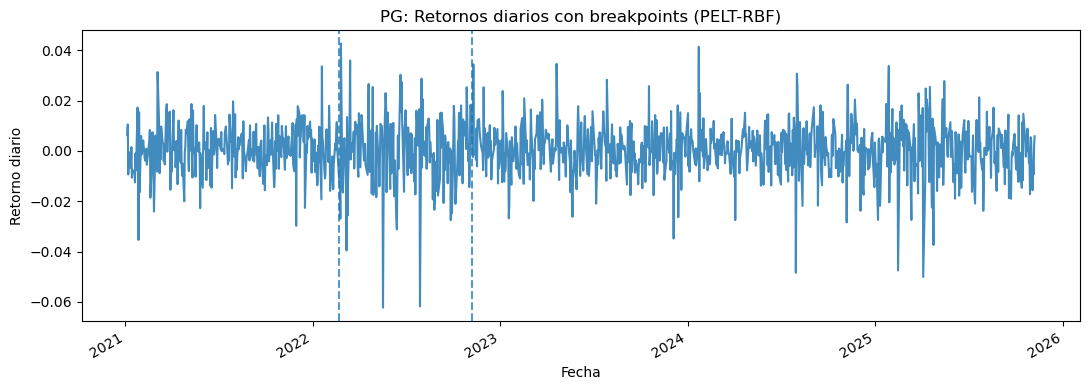


ADP — Detección de rupturas en retornos diarios

Breakpoints detectados (PELT-RBF): 2
Fechas de ruptura: 2021-11-24, 2023-02-13

— Métricas por segmento (anualizado desde retornos diarios) —
 Segmento     Inicio        Fin   N  Media_diaria  Vol_diaria  Media_anualizada_%  Vol_anualizada_%
        1 2021-01-05 2021-11-23 225      0.001618    0.011419           40.769602         18.127185
        2 2021-11-24 2023-02-10 305      0.000083    0.017474            2.082071         27.739428
        3 2023-02-13 2025-11-07 688      0.000328    0.011766            8.272562         18.677418

— Evidencia estadística en cada ruptura (frontera) —
Ruptura_en  t(Welch)      p_t  W(Levene)  p_levene  ΔMedia_diaria  ΔVol_diaria  N_antes  N_despues  sig_media(p<0.05)  sig_var(p<0.05)
2021-11-24  1.221095 0.222602  28.715973  0.000000      -0.001535     0.006055      225        305              False             True
2023-02-13 -0.224032 0.822839  59.794887  0.000000       0.000246    -0.005709      

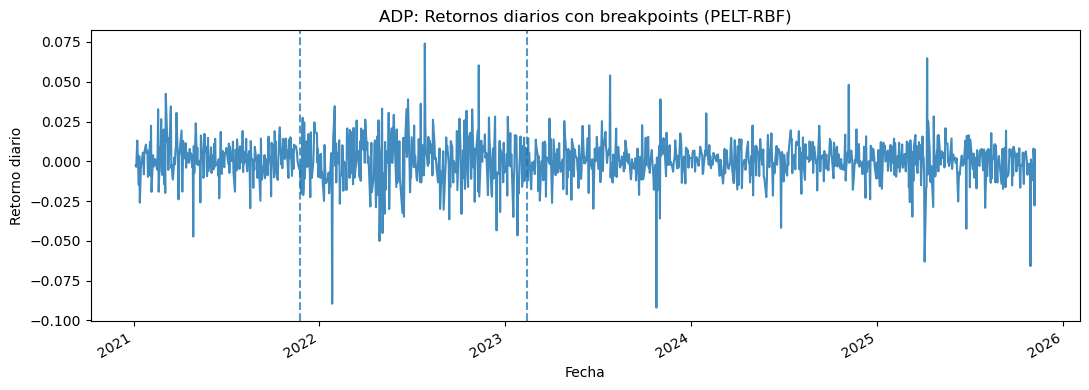


LMT — Detección de rupturas en retornos diarios

Breakpoints detectados (PELT-RBF): 3
Fechas de ruptura: 2022-02-07, 2022-11-22, 2025-01-13

— Métricas por segmento (anualizado desde retornos diarios) —
 Segmento     Inicio        Fin   N  Media_diaria  Vol_diaria  Media_anualizada_%  Vol_anualizada_%
        1 2021-01-05 2022-02-04 275      0.000629    0.012283           15.859136         19.499014
        2 2022-02-07 2022-11-21 200      0.001315    0.017912           33.127524         28.434037
        3 2022-11-22 2025-01-10 535      0.000120    0.011017            3.011567         17.489100
        4 2025-01-13 2025-11-07 208      0.000155    0.017277            3.907107         27.426582

— Evidencia estadística en cada ruptura (frontera) —
Ruptura_en  t(Welch)      p_t  W(Levene)  p_levene  ΔMedia_diaria  ΔVol_diaria  N_antes  N_despues  sig_media(p<0.05)  sig_var(p<0.05)
2022-02-07 -0.467035 0.640783  24.381626  0.000001       0.000685     0.005629      275        200         

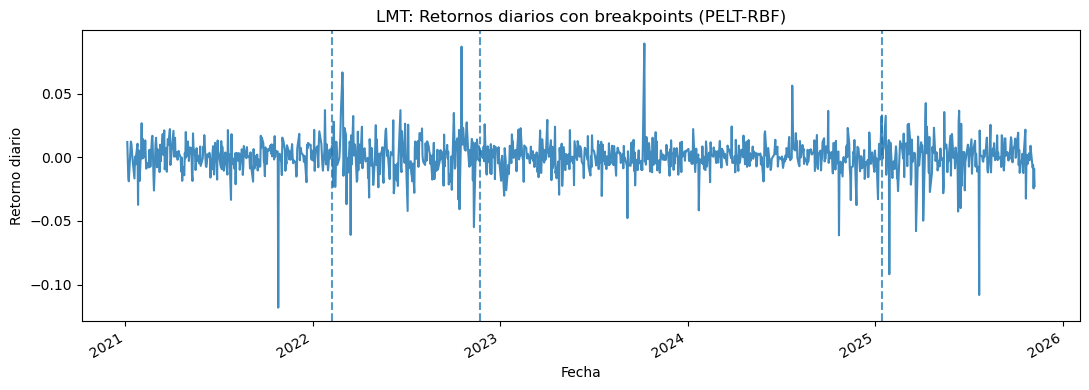


TXN — Detección de rupturas en retornos diarios

Breakpoints detectados (PELT-RBF): 3
Fechas de ruptura: 2021-05-21, 2022-01-07, 2022-11-15

— Métricas por segmento (anualizado desde retornos diarios) —
 Segmento     Inicio        Fin   N  Media_diaria  Vol_diaria  Media_anualizada_%  Vol_anualizada_%
        1 2021-01-05 2021-05-20  95      0.001751    0.021442           44.116611         34.038328
        2 2021-05-21 2022-01-06 160      0.000209    0.013191            5.271280         20.940836
        3 2022-01-07 2022-11-14 215      0.000107    0.020812            2.702307         33.038686
        4 2022-11-15 2025-11-07 748      0.000181    0.019648            4.552082         31.190166

— Evidencia estadística en cada ruptura (frontera) —
Ruptura_en  t(Welch)      p_t  W(Levene)  p_levene  ΔMedia_diaria  ΔVol_diaria  N_antes  N_despues  sig_media(p<0.05)  sig_var(p<0.05)
2021-05-21  0.633159 0.527686  27.733714  0.000000      -0.001541    -0.008251       95        160         

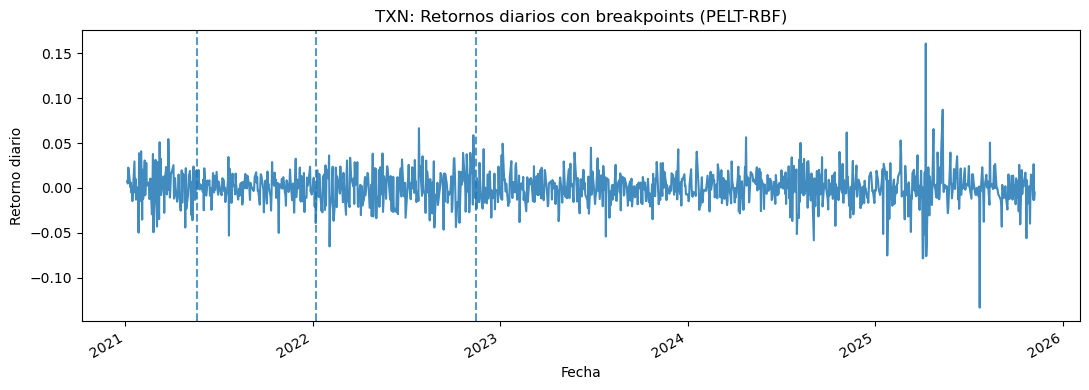


Hecho. Ajusta START/END, MIN_SEG_LEN o PENALTY_GRID si quieres más/menos sensibilidad.


In [ ]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
import ruptures as rpt
from scipy import stats
import matplotlib.pyplot as plt

# =========================
# PARÁMETROS
# =========================
TICKERS = ["WM", "PG", "ADP", "LMT", "TXN"]
START = "2021-01-01"   # ajusta si quieres otro horizonte
END   = None           # None => hasta hoy

TRADING_DAYS = 252
MIN_SEG_LEN = 60                 # mínimo puntos por segmento (~3 meses)
MAX_BREAKS  = 8                  # máximo típico para Binseg
PENALTY_GRID = np.linspace(3, 12, 10)  # rejilla de penalización para PELT

# =========================
# UTILIDADES
# =========================
def annualize_return(ret_series, freq=TRADING_DAYS):
    return ret_series.mean() * freq

def annualize_vol(ret_series, freq=TRADING_DAYS):
    return ret_series.std() * math.sqrt(freq)

def welch_t_and_levene(seg1, seg2):
    """ Devuelve ((t_stat, p_t), (W_stat, p_levene)) """
    t_stat, p_t = stats.ttest_ind(seg1, seg2, equal_var=False, nan_policy='omit')
    W_stat, p_lev = stats.levene(seg1, seg2, center='median')
    return (t_stat, p_t), (W_stat, p_lev)

def segment_tables(series, bkp_idx):
    """
    Construye:
    - seg_df: métricas por segmento
    - evid_df: evidencia en cada ruptura (entre seg k y k+1)
    """
    n = len(series)
    cuts = [0] + sorted([i for i in bkp_idx if 0 < i < n]) + [n]

    seg_rows = []
    for k in range(len(cuts)-1):
        a, b = cuts[k], cuts[k+1]
        seg = series.iloc[a:b]
        seg_rows.append({
            "Segmento": k+1,
            "Inicio": seg.index[0].date(),
            "Fin": seg.index[-1].date(),
            "N": len(seg),
            "Media_diaria": seg.mean(),
            "Vol_diaria": seg.std(),
            "Media_anualizada_%": annualize_return(seg)*100,
            "Vol_anualizada_%": annualize_vol(seg)*100
        })
    seg_df = pd.DataFrame(seg_rows)

    evid_rows = []
    for k in range(len(cuts)-2):
        a, b, c = cuts[k], cuts[k+1], cuts[k+2]
        seg1 = series.iloc[a:b]
        seg2 = series.iloc[b:c]
        (t_stat, p_t), (W_stat, p_lev) = welch_t_and_levene(seg1, seg2)
        evid_rows.append({
            "Ruptura_en": series.index[b].date(),
            "t(Welch)": t_stat, "p_t": p_t,
            "W(Levene)": W_stat, "p_levene": p_lev,
            "ΔMedia_diaria": seg2.mean() - seg1.mean(),
            "ΔVol_diaria": seg2.std() - seg1.std(),
            "N_antes": len(seg1), "N_despues": len(seg2)
        })
    evid_df = pd.DataFrame(evid_rows)
    return seg_df, evid_df

def select_pelt_breaks(x, model="rbf", min_size=MIN_SEG_LEN, penalty_grid=PENALTY_GRID):
    """
    Ejecuta PELT en varias penalizaciones y elige la mejor con criterio simple:
    costo total = error de ajuste + pen * nº rupturas (menor es mejor).
    """
    # Modelo de costo acorde
    if model == "rbf":
        cost_model = rpt.costs.CostRbf().fit(x)
    elif model == "l2":
        cost_model = rpt.costs.CostL2().fit(x)
    else:
        cost_model = rpt.costs.CostRbf().fit(x)

    best_cost = None
    best_info = {"bkp": [], "pen": None, "cost": None}

    for pen in penalty_grid:
        algo = rpt.Pelt(model=model, min_size=min_size).fit(x)
        bkp = algo.predict(pen=pen)
        if len(bkp) > 0 and bkp[-1] == len(x):
            bkp = bkp[:-1]
        # Calculate cost for segments defined by breakpoints
        segment_costs = [cost_model.error(start, end) for start, end in rpt.utils.pairwise([0] + bkp + [len(x)])]
        cost = sum(segment_costs) + pen * len(bkp)

        if (best_cost is None) or (cost < best_cost):
            best_cost = cost
            best_info = {"bkp": bkp, "pen": float(pen), "cost": float(cost)}

    return best_info

def plot_series_with_breaks(series, bkps, title):
    """ Grafica retornos y marca líneas verticales en cada breakpoint. """
    plt.figure(figsize=(11, 4))
    series.plot(alpha=0.85)
    for i in bkps:
        if 0 < i < len(series):
            plt.axvline(series.index[i], linestyle="--", alpha=0.75)
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Retorno diario")
    plt.tight_layout()
    plt.show()

# =========================
# DESCARGA Y PREPARACIÓN
# =========================
print("Descargando precios ajustados de Yahoo Finance…")
prices = yf.download(TICKERS, start=START, end=END, auto_adjust=False, progress=False)["Adj Close"]
prices = prices.dropna(how="all").ffill().dropna()
returns = prices.pct_change().dropna()

# =========================
# PROCESO POR ACTIVO
# =========================
pd.set_option("display.float_format", lambda x: f"{x:,.6f}")

for tic in TICKERS:
    print("\n" + "="*80)
    print(f"{tic} — Detección de rupturas en retornos diarios")
    print("="*80)

    r = returns[tic].dropna()
    x = r.values.reshape(-1, 1)

    # PELT modelo principal (RBF)
    pelt = select_pelt_breaks(x, model="rbf", min_size=MIN_SEG_LEN, penalty_grid=PENALTY_GRID)
    bkps = pelt["bkp"]

    # Tablas en memoria (se imprimen)
    seg_df, evid_df = segment_tables(r, bkps)

    # Mostrar resultados en consola
    bkp_fechas = [r.index[i].date() for i in bkps if 0 < i < len(r)]
    print(f"\nBreakpoints detectados (PELT-RBF): {len(bkp_fechas)}")
    if bkp_fechas:
        print("Fechas de ruptura:", ", ".join(map(str, bkp_fechas)))
    else:
        print("No se detectaron rupturas bajo la configuración actual.")

    print("\n— Métricas por segmento (anualizado desde retornos diarios) —")
    print(seg_df.to_string(index=False))

    if not evid_df.empty:
        # Sugerir significancia rápida
        evid_df["sig_media(p<0.05)"] = evid_df["p_t"] < 0.05
        evid_df["sig_var(p<0.05)"] = evid_df["p_levene"] < 0.05

        print("\n— Evidencia estadística en cada ruptura (frontera) —")
        print(evid_df.to_string(index=False))
    else:
        print("\nNo hay evidencia porque no hubo rupturas.")

    # Gráfica
    plot_series_with_breaks(r, bkps, f"{tic}: Retornos diarios con breakpoints (PELT-RBF)")

print("\nHecho. Ajusta START/END, MIN_SEG_LEN o PENALTY_GRID si quieres más/menos sensibilidad.")

Análisis:

Detectamos rupturas claras de régimen en todos los activos entre finales de 2021 y a lo largo de 2022.

Evidencia: en todas las rupturas el test de Levene dio p < 0.05 lo que indica cambios significativos de varianza (volatilidad). Los cambios de media no resultan significativos (Welch p > 0.05), es decir, lo que se movió de forma consistente fue el riesgo, no el retorno medio.

Eventos de cola : los periodos con volatilidad anualizada más alta (≈ 24%–34%+) concentran la mayor probabilidad de movimientos drásticos.

WM (Waste Management)

Rupturas: 2021-10-20 y 2022-11-15.

Pruebas: Levene significativo (cambios en la volatilidad); Welch no significativo (la media no cambia claramente).

Regímenes:

2021-01-05 → 2021-10-19: etapa muy positiva (+43.6% anual, vol 14.9%).

2021-10-20 → 2022-11-14: aumento de volatilidad (21.9%), casi sin ganancias (+3.1%).

2022-11-15 → 2025-09-23: cierta normalización (vol 17.5%, rend. +14.7%).

Eventos de cola: 2021-10-20 → 2022-11-14.

PG (Procter & Gamble)

Rupturas: 2022-02-22 y 2022-11-08.

Pruebas: Levene significativo; Welch no significativo.

Regímenes:

2021-01-05 → 2022-02-18: rend. +16.9%, vol 14.7%.

2022-02-22 → 2022-11-07: mucha volatilidad (23.9%) con pérdidas (-16.6%).

2022-11-08 → 2025-09-23: vol 16.3%, rend. +7.6%.

Eventos de cola: 2022-02-22 → 2022-11-07.

ADP (Automatic Data Processing)

Rupturas: 2021-11-24 y 2023-02-13.

Pruebas: Levene significativo; Welch no significativo.

Regímenes:

2021-01-05 → 2021-11-23: etapa muy rentable (+40.8% anual, vol 18.1%).

2021-11-24 → 2023-02-10: volatilidad alta (27.7%), rend. bajo (+2.1%).

2023-02-13 → 2025-09-23: más estable (vol 18.5%, rend. +13.5%).

Eventos de cola: 2021-11-24 → 2023-02-10.

LMT (Lockheed Martin)

Rupturas: 2022-02-07, 2022-11-22 y 2025-01-13.

Pruebas: Levene significativo; Welch no significativo.

Regímenes:

2021-01-05 → 2022-02-04: rend. +15.9%, vol 19.5%.

2022-02-07 → 2022-11-21: volatilidad muy alta (28.4%) y rend. elevado (+33.1%).

2022-11-22 → 2025-01-10: descompresión (vol 17.5%, rend. +3.0%).

2025-01-13 → 2025-09-23: nuevo repunte de volatilidad (28.8%), rend. +13.0%.

Eventos de cola: 2022-02-07 → 2022-11-21 y 2025-01-13 → 2025-09-23.

TXN (Texas Instruments)

Rupturas: 2021-05-21, 2022-01-07 y 2022-11-15.

Pruebas: Levene significativo; Welch no significativo.

Regímenes:

2021-01-05 → 2021-05-20: volatilidad muy alta (34.0%), rend. fuerte (+44.1%).

2021-05-21 → 2022-01-06: vol 20.9%, rend. +5.3%.

2022-01-07 → 2022-11-14: vuelve la volatilidad alta (33.0%), rend. +2.7%.

2022-11-15 → 2025-09-23: vol todavía elevada (31.2%), rend. +8.7%.

Eventos de cola: 2021-01-05 → 2021-05-20, 2022-01-07 → 2022-11-14 y 2022-11-15 → 2025-09-23.





### Acción vs Índice

C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metricas = pd.concat([metricas, 

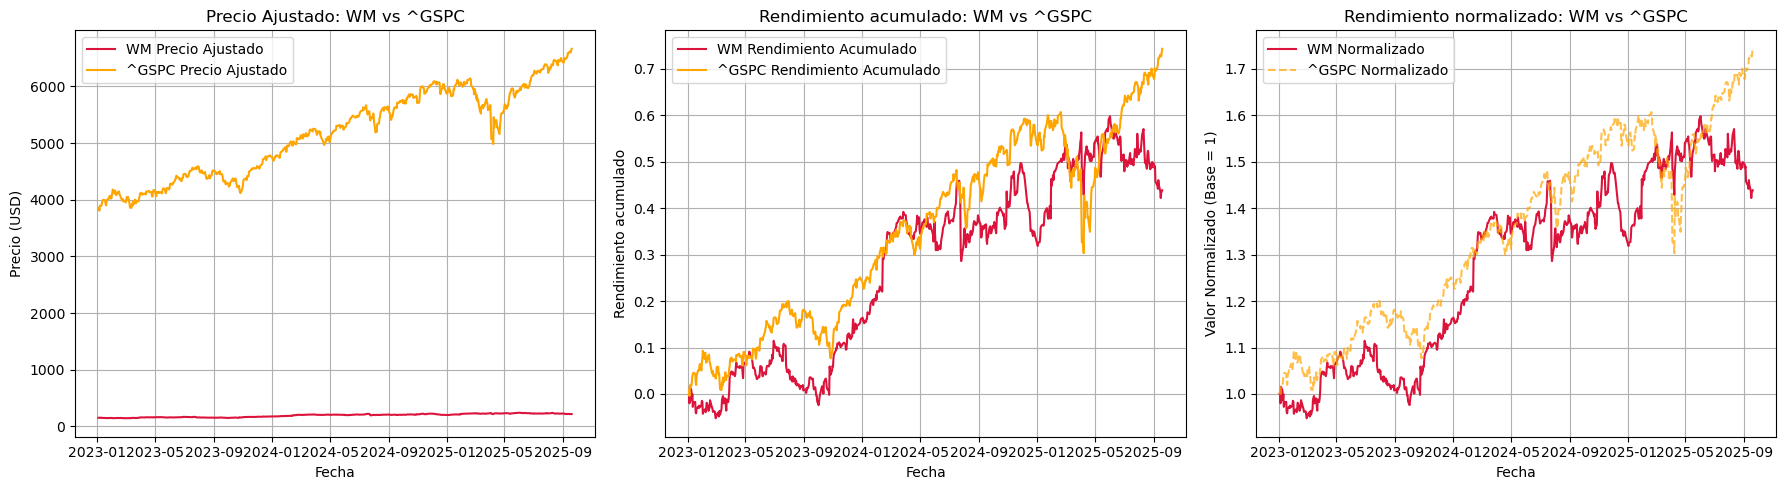

C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


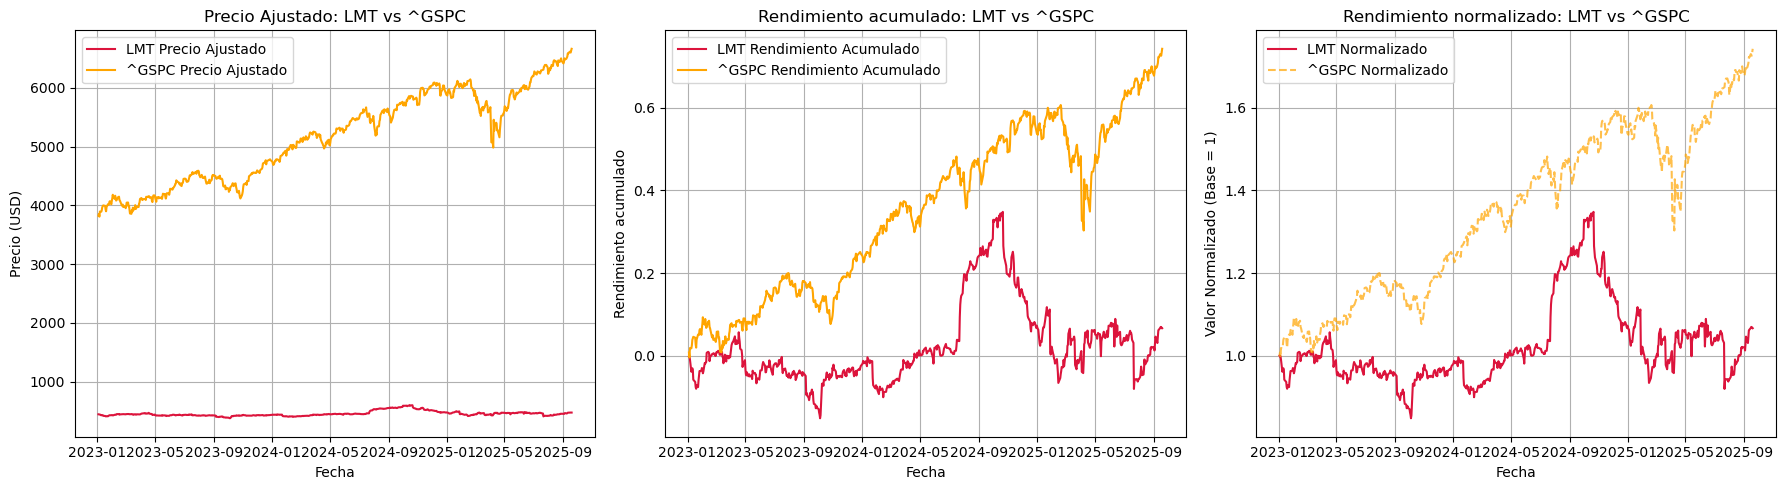

C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


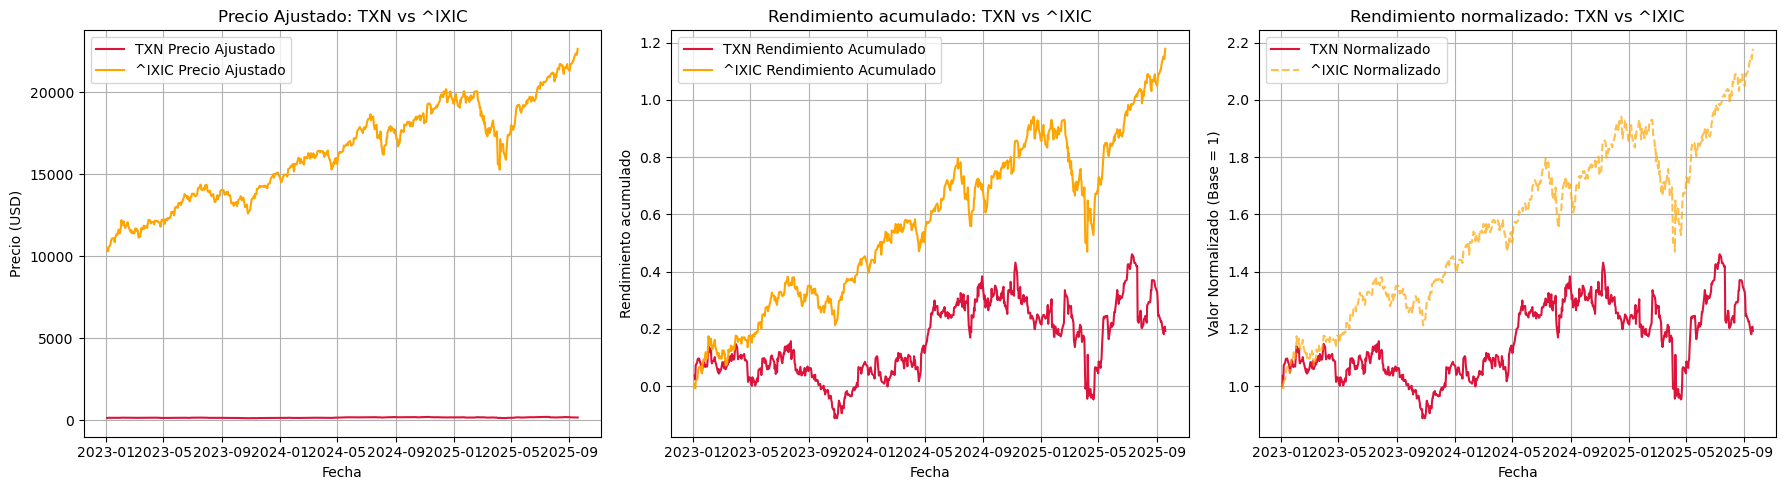

C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


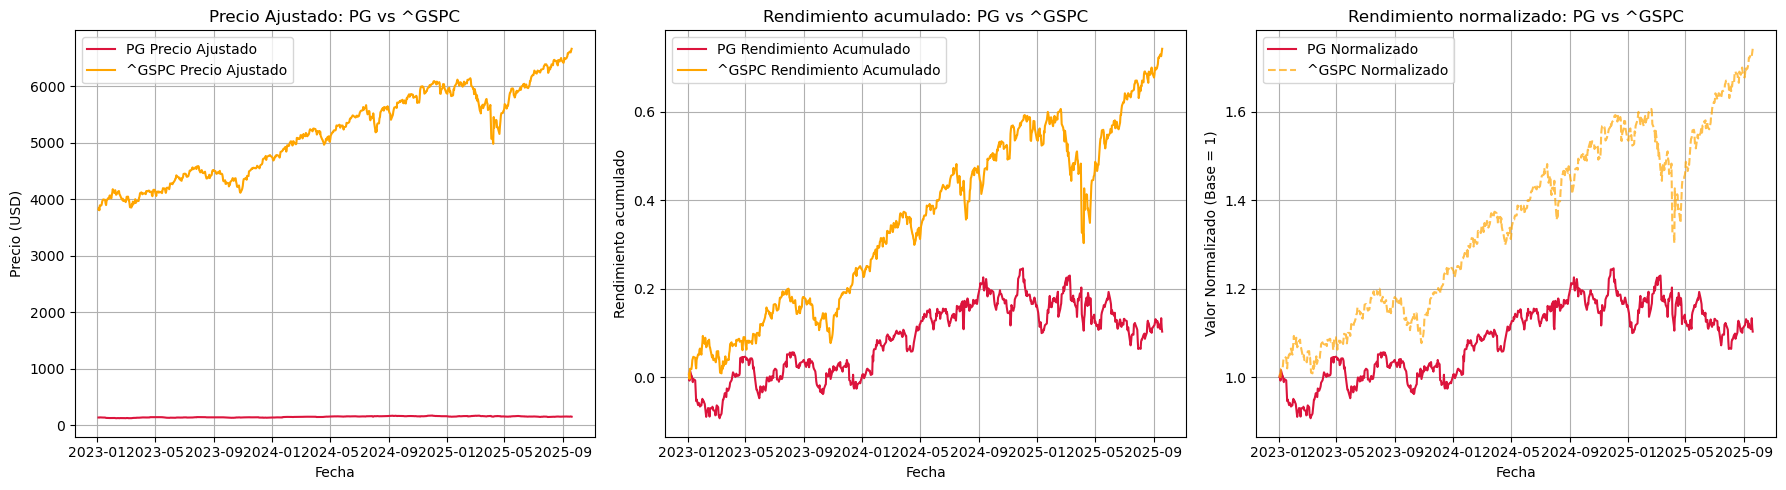

C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed
C:\Users\juanm\AppData\Local\Temp\ipykernel_23784\1911208339.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed


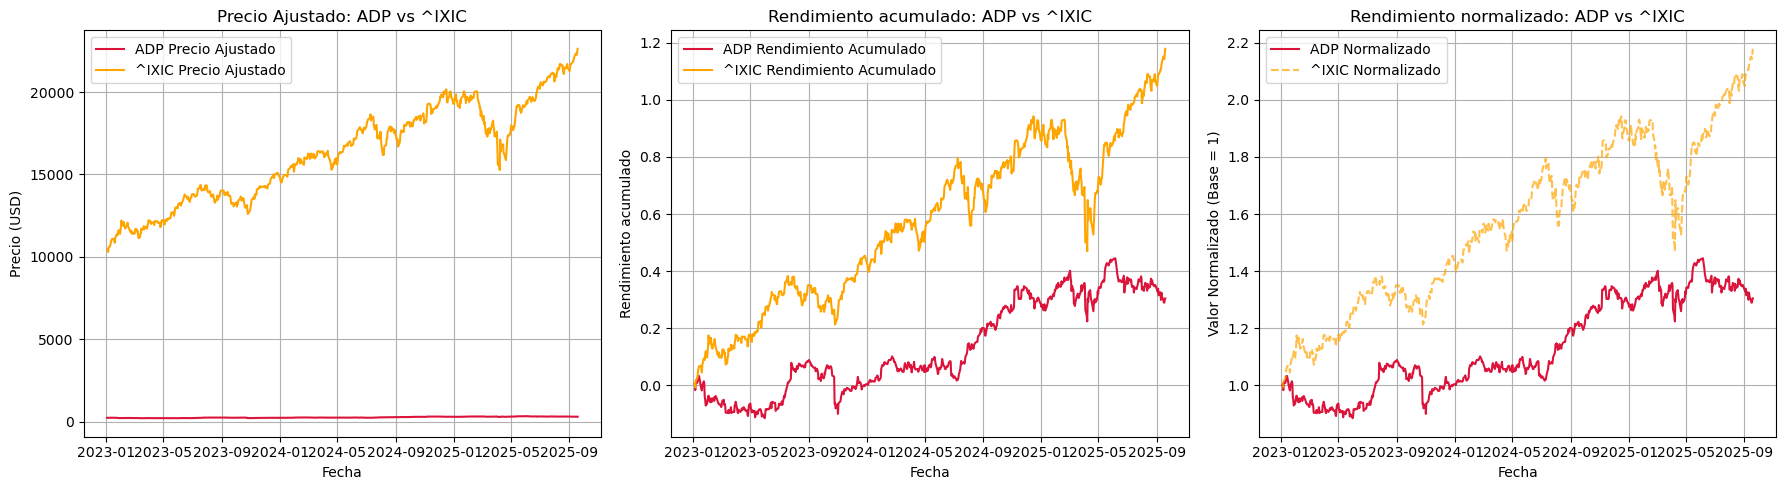

,Activo,Indice,Rendimiento Acumulado Activo (%),Rendimiento Acumulado Indice (%),Drawdown Max Activo (%),Drawdown Max Indice (%),Volatilidad Anualizada Activo (%),Volatilidad Anualizada Indice (%)
0,WM,^GSPC,43.833949,74.270818,-12.413958,-18.902206,17.663002,15.348034
1,LMT,^GSPC,6.654583,74.270818,-31.788421,-18.902206,21.028859,15.348034
2,TXN,^IXIC,19.299598,117.883152,-33.411974,-24.318465,31.498902,20.444453
3,PG,^GSPC,10.277904,74.270818,-14.650587,-18.902206,16.332264,15.348034
4,ADP,^IXIC,30.419083,117.883152,-17.332290,-24.318465,18.842380,20.444453


In [ ]:
# @title Comparación

activos = ["WM", "LMT", "TXN", "PG", "ADP"]
start_date = "2023-01-01"
end_date = "2025-09-20"

# -----------------------------
# Mapeo de índices
# -----------------------------
indices = {
    "WM": "^GSPC",
    "LMT": "^GSPC",
    "TXN": "^IXIC",
    "PG": "^GSPC",
    "ADP": "^IXIC"
}

# -----------------------------
# DataFrame para métricas
# -----------------------------
metricas = pd.DataFrame(columns=["Activo","Indice",
                                 "Rendimiento Acumulado Activo (%)","Rendimiento Acumulado Indice (%)",
                                 "Drawdown Max Activo (%)","Drawdown Max Indice (%)",
                                 "Volatilidad Anualizada Activo (%)","Volatilidad Anualizada Indice (%)"])

# -----------------------------
# Función drawdown
# -----------------------------
def max_drawdown(series):
    cum_max = series.cummax()
    drawdown = (series - cum_max) / cum_max
    return drawdown.min()

# -----------------------------
# Función normalizar
# -----------------------------
def normalizar(series):
    return series / series.iloc[0]

# -----------------------------
# Loop por activo
# -----------------------------
for activo in activos:
    indice = indices[activo]

    # Descargar datos
    data_accion = yf.download(activo, start=start_date, end=end_date)['Close'].squeeze()
    data_indice = yf.download(indice, start=start_date, end=end_date)['Close'].squeeze()

    # Retornos diarios
    ret_accion = data_accion.pct_change().dropna()
    ret_indice = data_indice.pct_change().dropna()

    # Rendimiento acumulado
    cum_accion = (1 + ret_accion).cumprod() - 1
    cum_indice = (1 + ret_indice).cumprod() - 1

    # Drawdown máximo
    dd_accion = max_drawdown(data_accion)
    dd_indice = max_drawdown(data_indice)

    # Volatilidad anualizada
    vol_accion = ret_accion.std() * np.sqrt(252)
    vol_indice = ret_indice.std() * np.sqrt(252)

    # Guardar métricas en el DataFrame
    metricas = pd.concat([metricas, pd.DataFrame({
        "Activo":[activo],
        "Indice":[indice],
        "Rendimiento Acumulado Activo (%)":[cum_accion.values[-1]*100],
        "Rendimiento Acumulado Indice (%)":[cum_indice.values[-1]*100],
        "Drawdown Max Activo (%)":[dd_accion*100],
        "Drawdown Max Indice (%)":[dd_indice*100],
        "Volatilidad Anualizada Activo (%)":[vol_accion*100],
        "Volatilidad Anualizada Indice (%)":[vol_indice*100]
    })], ignore_index=True)

    # -----------------------------
    # Graficas en una fila: 3 subplots
    # -----------------------------
    plt.figure(figsize=(18,5))

    # 1️ Precios ajustados
    plt.subplot(1,3,1)
    plt.plot(data_accion, label=f"{activo} Precio Ajustado", color="crimson")
    plt.plot(data_indice, label=f"{indice} Precio Ajustado", color="orange")
    plt.title(f"Precio Ajustado: {activo} vs {indice}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")
    plt.legend()
    plt.grid(True)

    # 2️ Rendimiento acumulado
    plt.subplot(1,3,2)
    plt.plot(cum_accion, label=f"{activo} Rendimiento Acumulado", color="crimson")
    plt.plot(cum_indice, label=f"{indice} Rendimiento Acumulado", color="orange")
    plt.title(f"Rendimiento acumulado: {activo} vs {indice}")
    plt.xlabel("Fecha")
    plt.ylabel("Rendimiento acumulado")
    plt.legend()
    plt.grid(True)

    # 3️ Rendimiento acumulado normalizado
    plt.subplot(1,3,3)
    norm_accion = normalizar(data_accion)
    norm_indice = normalizar(data_indice)
    plt.plot(norm_accion, label=f"{activo} Normalizado", color="crimson")
    plt.plot(norm_indice, linestyle='--', label=f"{indice} Normalizado", color="orange", alpha=0.7)
    plt.title(f"Rendimiento normalizado: {activo} vs {indice}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor Normalizado (Base = 1)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Mostrar DataFrame final
# -----------------------------
metricas


Waste Management (WM) presentó un rendimiento acumulado del 43.83%, inferior al del índice S&P 500 (^GSPC), que fue del 74.27%. Esto indica que, aunque la acción creció de manera positiva, no logró seguir el ritmo del mercado general. Su drawdown máximo fue de -12.41%, menor que el -18.90% del índice, lo que sugiere que WM mostró menor vulnerabilidad durante caídas del mercado, es decir, fue más resiliente. La volatilidad anualizada fue de 17.66%, ligeramente superior al 15.35% del S&P 500, lo que indica que la acción tuvo movimientos diarios algo más amplios, pero sin comprometer la estabilidad durante las caídas. En conjunto, WM se percibe como un activo defensivo, con crecimiento moderado y menor riesgo relativo durante caídas.

Lockheed Martin (LMT) tuvo un rendimiento acumulado muy bajo, del 6.65%, comparado con el 74.27% del S&P 500, reflejando un periodo difícil para esta acción. Su drawdown máximo fue de -31.79%, mucho más profundo que el índice, lo que indica que LMT experimentó caídas significativas durante los momentos de mercado adversos. La volatilidad anualizada de 21.03% también es superior a la del índice, mostrando mayor riesgo y fluctuaciones diarias. Esto sugiere que, en este periodo, LMT combinó bajo crecimiento con alta exposición a riesgos, mostrando un perfil más volátil y sensible a movimientos del mercado.

Texas Instruments (TXN) creció un 19.30% frente al 117.88% del Nasdaq Composite (^IXIC), evidenciando que la acción no acompañó la fuerte recuperación tecnológica del mercado. Su drawdown máximo de -33.41% supera el -24.32% del índice, mientras que su volatilidad anualizada es muy alta (31.50%), lo que indica que la acción experimentó movimientos bruscos y riesgo elevado. En este contexto, TXN se comportó como un activo arriesgado, con un desempeño inferior al mercado tecnológico durante el periodo analizado.

Procter & Gamble (PG) presentó un rendimiento acumulado del 10.28%, claramente menor al 74.27% del S&P 500, reflejando un crecimiento modesto en comparación con el mercado general. Su drawdown máximo fue de -14.65%, inferior al del índice, lo que demuestra que PG se mantuvo relativamente estable durante las caídas. La volatilidad anualizada de 16.33% es apenas superior al índice, lo que confirma que sus movimientos diarios fueron contenidos. PG muestra un perfil de activo defensivo, con estabilidad durante periodos volátiles pero crecimiento limitado.

Automatic Data Processing (ADP) registró un rendimiento acumulado del 30.42% frente al 117.88% del Nasdaq, lo que indica un crecimiento moderado comparado con el índice tecnológico. Su drawdown máximo de -17.33% fue menor que el -24.32% del índice, y la volatilidad anualizada de 18.84% también fue más baja que la del Nasdaq, sugiriendo que ADP experimentó menores caídas y movimientos más controlados que el mercado tecnológico en general. Esto muestra un perfil más defensivo dentro del sector tecnológico, ofreciendo crecimiento moderado con menor exposición a riesgos extremos.

### Conclusión
Durante el periodo analizado, ninguno de los activos superó a su índice de referencia, pero se observa un comportamiento claramente diferenciado según perfil de riesgo y sector. WM y PG mostraron características defensivas: aunque su rendimiento acumulado fue menor al del S&P 500, presentaron drawdowns más moderados y volatilidad controlada, lo que indica estabilidad frente a caídas del mercado. ADP, dentro del sector tecnológico, combinó crecimiento moderado con menor drawdown y volatilidad que el Nasdaq, mostrando un perfil relativamente defensivo frente a sus pares tecnológicos. En contraste, LMT y TXN evidenciaron alta exposición al riesgo: presentaron drawdowns profundos y volatilidad elevada, mientras que su rendimiento acumulado quedó muy por debajo de sus índices, indicando periodos de fuerte sensibilidad a movimientos del mercado y bajo desempeño relativo. En conjunto, los activos defensivos se comportaron de manera más estable y resiliente, mientras que los más industriales o tecnológicos mostraron mayor riesgo y menor crecimiento comparativo.

# Entrega 3
### Rendimientos y volatilidad
#### Pruebas de normalidad y estimación de probabilidades

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd

# Lista de tickers
tickers = [
    "LMT","TXN", "ADP","WM","PG","PEP"
]

# Fechas elegidas por el usuario
start_date = '2022-09-08'  # @param {type:"date"}
end_date   = '2025-10-14'  # @param {type:"date"}

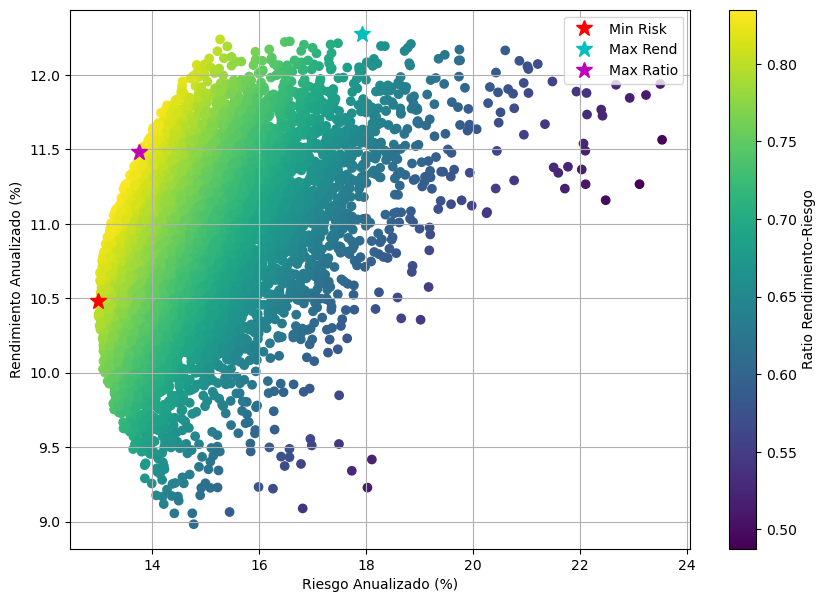


RESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)
Rendimiento anual: 10.480 %; Riesgo anual: 12.999 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.28047927 0.37971947 0.13102988 0.16003472 0.04873667]

RESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)
Rendimiento anual: 12.272 %; Riesgo anual: 17.931 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [3.01495001e-01 5.09804470e-03 3.19921180e-01 3.48225808e-05
 3.73450951e-01]

RESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)
Rendimiento anual: 11.482 %; Riesgo anual: 13.754 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.42663044 0.20329347 0.23502201 0.04964095 0.08541313]


In [ ]:
n_simulaciones = 10000 # @param {type:"integer"}

tickers=[ticker1, ticker2, ticker3,ticker4,ticker5]

# Inicializamos las simulaciones
X = np.random.rand(n_simulaciones, 5)
X = X / X.sum(axis=1)[:, None]  # normalizamos filas para que los pesos sumen 1

Rend_p = np.zeros((n_simulaciones, 1))
Risk_p = np.zeros((n_simulaciones, 1))

# Simulaciones de rendimientos y riesgos
for k in range(n_simulaciones):
    Rend_p[k, :] = np.dot(X[k, :], R.T)  # Rendimiento esperado (promedio diario)
    Risk_p[k, :] = np.sqrt(np.dot(np.dot(X[k, :], covar), X[k, :].T))  # Riesgo (desv. estándar)

# Crear el DataFrame de los portafolios
Portfolios = pd.DataFrame()
Portfolios[ticker1] = X[:, 0]
Portfolios[ticker2] = X[:, 1]
Portfolios[ticker3] = X[:, 2]
Portfolios[ticker4] = X[:, 3]
Portfolios[ticker5] = X[:, 4]

Portfolios['Rend'] = Rend_p
Portfolios['Risk'] = Risk_p

# Anualización de rendimientos y riesgos
Portfolios['Rend_Anual'] = (1 + Portfolios['Rend'])**252 - 1
Portfolios['Risk_Anual'] = Portfolios['Risk'] * np.sqrt(252)

# Identificar los portafolios clave
idx_min = np.argmin(Portfolios['Risk_Anual'])  # Menor riesgo anualizado
idx_max = np.argmax(Portfolios['Rend_Anual'])  # Mayor rendimiento anualizado
ratio = Portfolios['Rend_Anual'] / Portfolios['Risk_Anual']
idx_max_ratio = np.argmax(ratio)  # Mejor ratio

# Filtrar portafolios con rendimiento positivo y encontrar el de menor riesgo
tmp = Portfolios[Portfolios['Rend_Anual'] > 0]
idx_min_pos = tmp.index[np.argmin(tmp['Risk_Anual'])]
idx_max_pos = tmp.index[np.argmax(tmp['Rend_Anual'])]
idx_max_ratio_pos = tmp.index[np.argmax(ratio[tmp.index])]

# Visualización de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(Portfolios['Risk_Anual'] * 100, Portfolios['Rend_Anual'] * 100, c=ratio, cmap='viridis')
plt.colorbar(label='Ratio Rendimiento-Riesgo')

# Marcar los portafolios óptimos
plt.plot(Portfolios['Risk_Anual'][idx_min] * 100, Portfolios['Rend_Anual'][idx_min] * 100, 'r*', markersize=12, label='Min Risk')
plt.plot(Portfolios['Risk_Anual'][idx_max] * 100, Portfolios['Rend_Anual'][idx_max] * 100, 'c*', markersize=12, label='Max Rend')
plt.plot(Portfolios['Risk_Anual'][idx_max_ratio] * 100, Portfolios['Rend_Anual'][idx_max_ratio] * 100, 'm*', markersize=12, label='Max Ratio')

plt.xlabel('Riesgo Anualizado (%)')
plt.ylabel('Rendimiento Anualizado (%)')
plt.legend()
plt.grid()
plt.show()

# Resumen anualizado
print('\nRESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_min] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_min] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_min, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max_ratio] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max_ratio] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max_ratio, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos


In [ ]:
prices = data.copy()
log_prices = np.log(prices)
log_returns = log_prices.diff().dropna()

### 1.

In [ ]:
# @title Estimación de Rendimientos y volatilidad por acción

def annualize_log_return(mu_daily):
    return np.exp(mu_daily * 252) - 1

summary = []
for ticker in tickers:
    r = log_returns[ticker]
    mu = r.mean()
    sigma = r.std(ddof=1)
    summary.append({
        "Ticker": ticker,
        "Rend. diario (%)": mu * 100,
        "Vol. diaria (%)": sigma * 100,
        "Rend. anual (%)": annualize_log_return(mu) * 100,
        "Vol. anual (%)": sigma * np.sqrt(252) * 100
    })
summary_df = pd.DataFrame(summary)
print("Estadísticas básicas:")
display(summary_df)

Estadísticas básicas:


,Ticker,Rend. diario (%),Vol. diaria (%),Rend. anual (%),Vol. anual (%)
0,WM,0.053454,1.112640,14.419904,17.662612
1,PG,0.014387,1.031187,3.692117,16.369591
2,ADP,0.039056,1.193012,10.342818,18.938477
3,LMT,0.009474,1.336334,2.416253,21.213638
4,TXN,0.025951,1.984477,6.758264,31.502602


Los resultados muestran que WM (Waste Management) fue la acción con el mayor rendimiento anual promedio (14.42%), seguida de ADP (10.34%) y TXN (6.76%). En cambio, PG (Procter & Gamble) y LMT (Lockheed Martin) tuvieron rendimientos más bajos, de 3.69% y 2.42%, respectivamente.

En cuanto a la volatilidad, que refleja el riesgo o la inestabilidad del precio, TXN fue la más volátil (31.5% anual), mientras que PG fue la más estable (16.37% anual).

Esto significa que WM y ADP ofrecieron los mejores rendimientos, pero con un nivel de riesgo moderado, mientras que TXN fue más riesgosa y las otras dos más conservadoras.

In [ ]:
# @title Rendimientos y volatilidad del portafolio

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max_ratio] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max_ratio] * 100:.3f} %')




RESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)
Rendimiento anual: 11.482 %; Riesgo anual: 13.754 %


El portafolio con el mayor ratio de Sharpe (es decir, la mejor relación entre rendimiento y riesgo) tuvo un rendimiento anual esperado de 11.4% y una volatilidad anual de 13.6%, lo cual indica una combinación eficiente: un rendimiento atractivo para un riesgo relativamente bajo.

### 2.

In [ ]:
import scipy.stats as stats



 Análisis de normalidad para WM:
Jarque-Bera p-value: 0.0000
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0022
 Si p < 0.05 → se rechaza la normalidad.



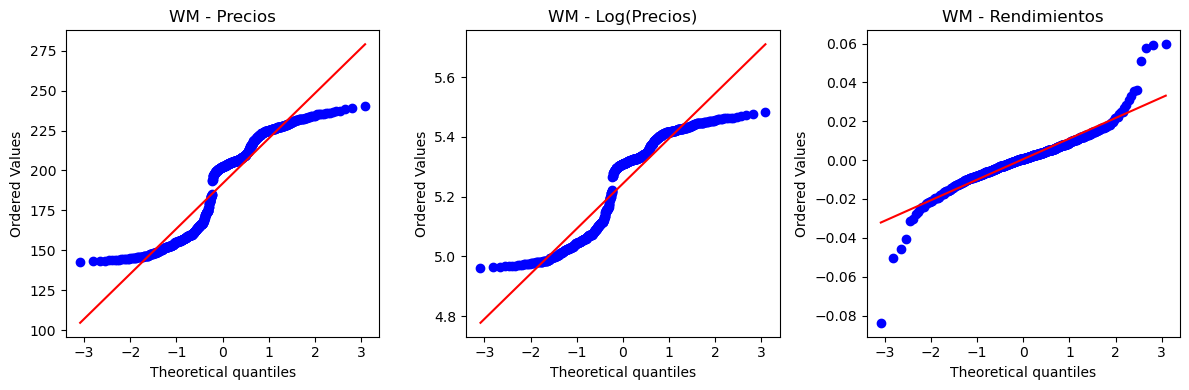


 Análisis de normalidad para PG:
Jarque-Bera p-value: 0.0000
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0290
 Si p < 0.05 → se rechaza la normalidad.



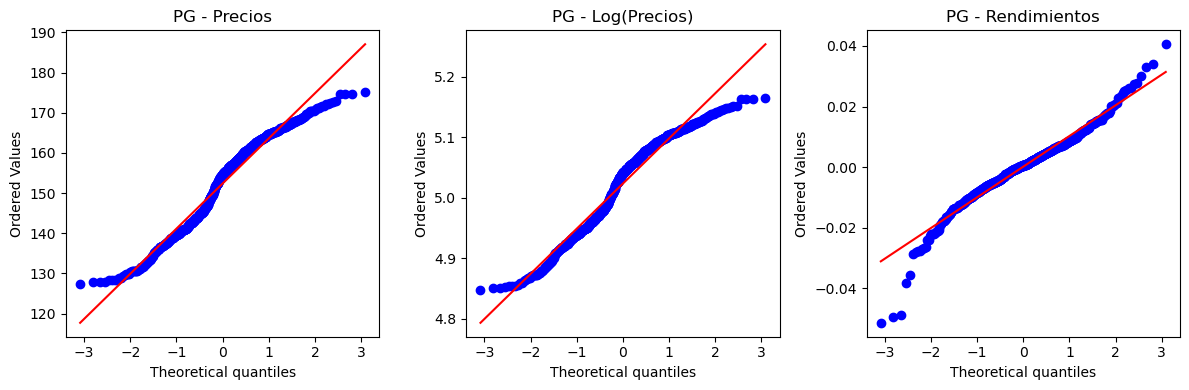


 Análisis de normalidad para ADP:
Jarque-Bera p-value: 0.0000
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0003
 Si p < 0.05 → se rechaza la normalidad.



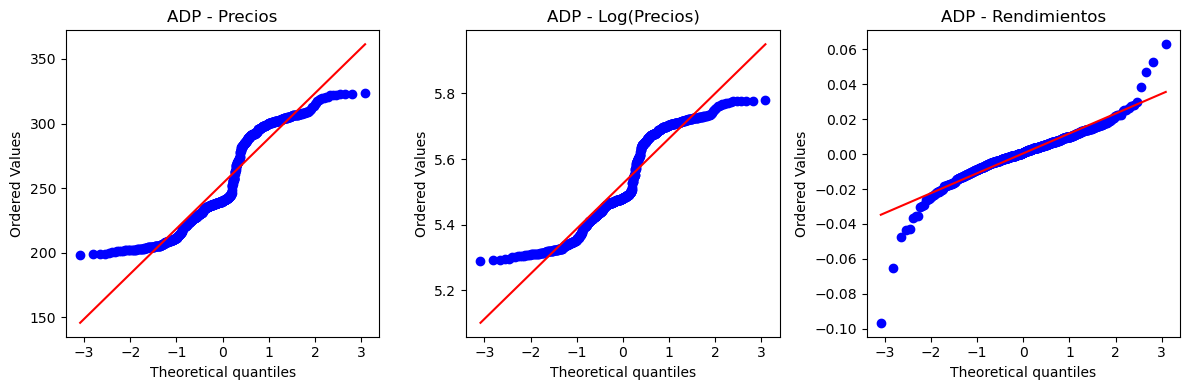


 Análisis de normalidad para LMT:
Jarque-Bera p-value: 0.0000
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0000
 Si p < 0.05 → se rechaza la normalidad.



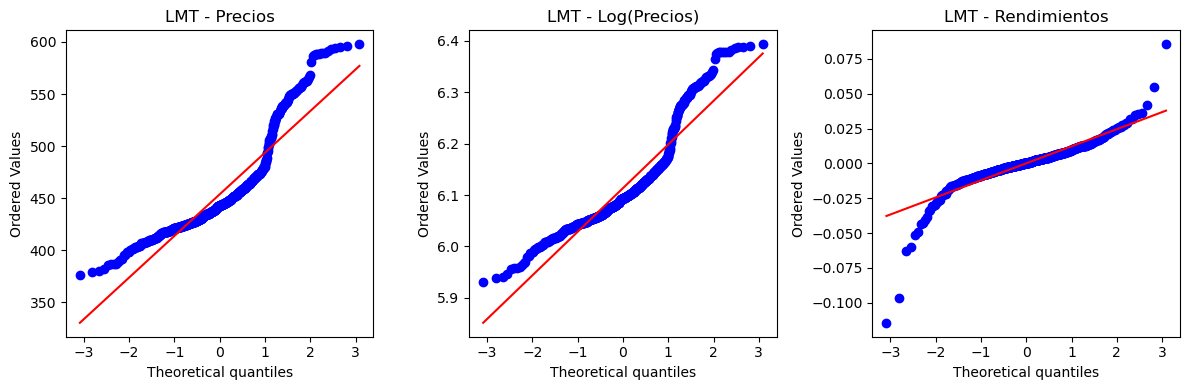


 Análisis de normalidad para TXN:
Jarque-Bera p-value: 0.0000
Shapiro-Wilk p-value: 0.0000
Kolmogorov-Smirnov p-value: 0.0010
 Si p < 0.05 → se rechaza la normalidad.



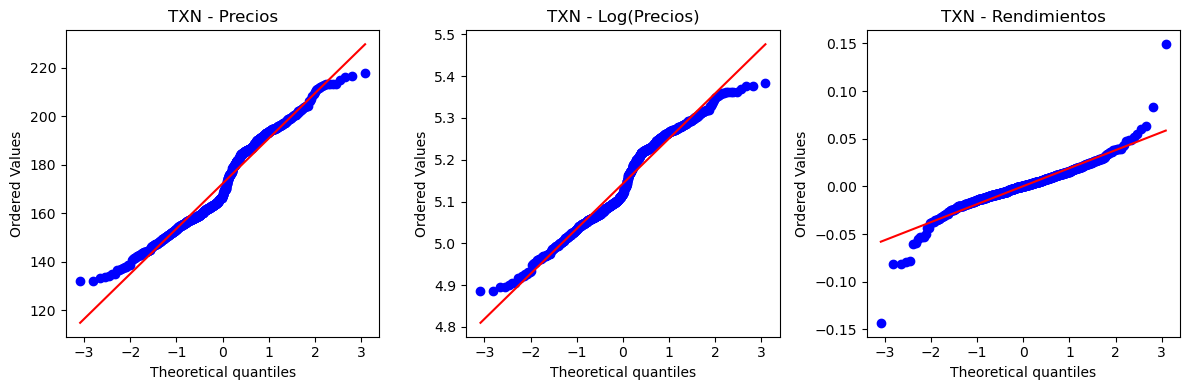

In [ ]:
# @title Prueba de normalidad para activos

def normality_tests(series):
    x = series.dropna().values
    jb_stat, jb_p = stats.jarque_bera(x)
    sh_stat, sh_p = stats.shapiro(x[:min(5000, len(x))])  # Shapiro hasta 5000 obs.
    mu, sigma = np.mean(x), np.std(x, ddof=1)
    ks_stat, ks_p = stats.kstest(x, 'norm', args=(mu, sigma))
    return jb_p, sh_p, ks_p

for ticker in tickers:
    print(f"\n Análisis de normalidad para {ticker}:")
    jb_p, sh_p, ks_p = normality_tests(log_returns[ticker])
    print(f"Jarque-Bera p-value: {jb_p:.4f}")
    print(f"Shapiro-Wilk p-value: {sh_p:.4f}")
    print(f"Kolmogorov-Smirnov p-value: {ks_p:.4f}")
    print(" Si p < 0.05 → se rechaza la normalidad.\n")

    # QQ-plots
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    stats.probplot(prices[ticker].dropna(), dist="norm", plot=ax[0])
    ax[0].set_title(f"{ticker} - Precios")
    stats.probplot(log_prices[ticker].dropna(), dist="norm", plot=ax[1])
    ax[1].set_title(f"{ticker} - Log(Precios)")
    stats.probplot(log_returns[ticker].dropna(), dist="norm", plot=ax[2])
    ax[2].set_title(f"{ticker} - Rendimientos")
    plt.tight_layout()
    plt.show()

Aquí se aplicaron tres pruebas estadísticas (Jarque-Bera, Shapiro-Wilk y Kolmogorov-Smirnov) para ver si los rendimientos y precios seguían una distribución normal, que es una suposición común en finanzas (curva de campana).

En todos los casos, los p-values fueron menores a 0.05, lo que significa que se rechaza la hipótesis de normalidad:

- Los rendimientos de las acciones no se comportan como una distribución normal.

- Lo mismo ocurre con los precios y con los logaritmos de los precios.

- Los QQ-plots (gráficas de probabilidad) seguramente mostraron colas más gruesas y valores extremos, lo que indica que las series tienen más eventos atípicos de lo que tendría una distribución normal.

Esto es algo habitual en los mercados financieros: los rendimientos tienden a tener colas pesadas (fat tails), es decir, los movimientos extremos (grandes subidas o caídas) ocurren con más frecuencia de lo que predice el modelo normal.

Estadísticas del portafolio (máx Sharpe positivo):
Rend. anual estimado: 11.156%
Vol. anual estimada:  14.502%

Pruebas de normalidad (p-values) — Portafolio (máx Sharpe positivo)
- Precios (Δ%):  JB=1.421e-99 | Shapiro=2.831e-14 | KS=0.003237
- Δ Log(Precios):  JB=6.816e-105 | Shapiro=1.668e-14 | KS=0.002213
- Rendimientos:  JB=6.16e-100 | Shapiro=2.673e-14 | KS=0.003154
Regla: si p < 0.05, se rechaza la normalidad.



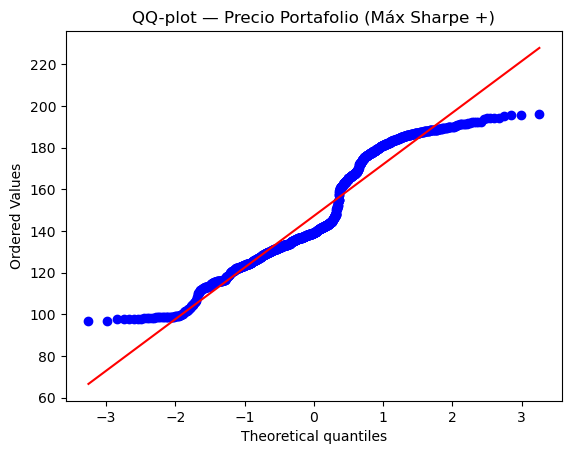

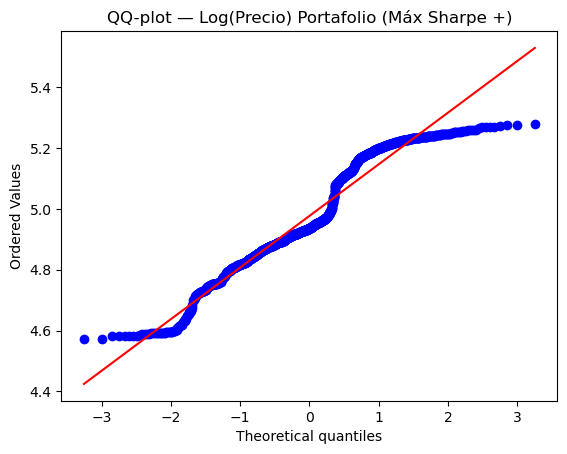

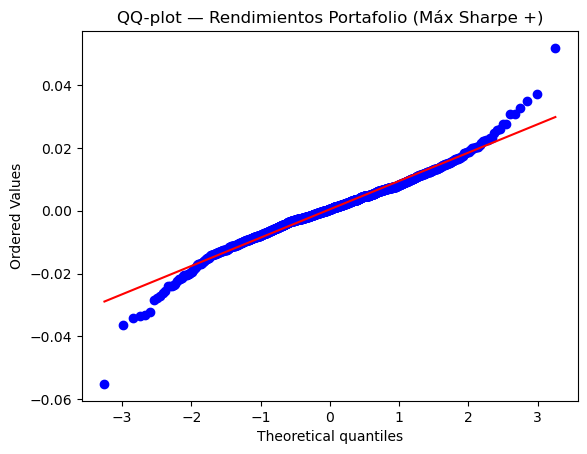


RESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)
Rendimiento anual: 11.482 %; Riesgo anual: 13.754 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.42663044 0.20329347 0.23502201 0.04964095 0.08541313]


In [ ]:
# @title  Prueba de normalidad para el portafolio
port_tickers = tickers  # mismos 5 tickers que simulaste
port_weights = Portfolios.loc[idx_max_ratio_pos, port_tickers].values
assert np.isclose(port_weights.sum(), 1.0), "Los pesos no suman 1.0"

ret_port = (returns[port_tickers] @ port_weights).dropna()  # rendimientos diarios del portafolio

precio_base = 100.0
precio_port = precio_base * (1.0 + ret_port).cumprod()
logprecio_port = np.log(precio_port)

# --- 2) Estadísticas y anualización (consistentes con simple returns)
mu_d = np.log1p(ret_port).mean()              # media diaria en log-equivalente
sd_d = ret_port.std(ddof=1)                   # std diaria (simple)
rend_anual = np.exp(mu_d * 252) - 1           # anualización desde log
vol_anual = sd_d * np.sqrt(252)               # volatilidad anual (desde std simple)

print("Estadísticas del portafolio (máx Sharpe positivo):")
print(f"Rend. anual estimado: {rend_anual*100:.3f}%")
print(f"Vol. anual estimada:  {vol_anual*100:.3f}%\n")

# --- 3) Pruebas de normalidad (precios, log(precios), rendimientos)
def normality_tests(series):
    x = pd.Series(series).dropna().values
    jb_stat, jb_p = stats.jarque_bera(x)
    sh_stat, sh_p = stats.shapiro(x[:min(5000, len(x))])  # Shapiro hasta 5000 obs.
    mu_hat, sigma_hat = x.mean(), x.std(ddof=1)
    ks_stat, ks_p = stats.kstest(x, 'norm', args=(mu_hat, sigma_hat))
    return {"JB_p": jb_p, "Shapiro_p": sh_p, "KS_p": ks_p}

tests_pre  = normality_tests(precio_port.pct_change().dropna())  # cambios % de precio
tests_logp = normality_tests(logprecio_port.diff().dropna())     # diferencias del log-precio
tests_ret  = normality_tests(ret_port)                           # rendimientos diarios

print("Pruebas de normalidad (p-values) — Portafolio (máx Sharpe positivo)")
for name, res in {
    "Precios (Δ%)": tests_pre,
    "Δ Log(Precios)": tests_logp,
    "Rendimientos": tests_ret
}.items():
    print(f"- {name}:  JB={res['JB_p']:.4g} | Shapiro={res['Shapiro_p']:.4g} | KS={res['KS_p']:.4g}")
print("Regla: si p < 0.05, se rechaza la normalidad.\n")

# --- 4) QQ-PLOTS (uno por figura)
def qqplot_1fig(series, title):
    plt.figure()
    stats.probplot(pd.Series(series).dropna(), dist="norm", plot=plt)
    plt.title(title)
    plt.show()

qqplot_1fig(precio_port,                 "QQ-plot — Precio Portafolio (Máx Sharpe +)")
qqplot_1fig(logprecio_port,              "QQ-plot — Log(Precio) Portafolio (Máx Sharpe +)")
qqplot_1fig(ret_port,                    "QQ-plot — Rendimientos Portafolio (Máx Sharpe +)")

# --- 5) Tu print de RESUMEN (usando el índice que ya creaste)
print('\nRESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max_ratio_pos] * 100:.3f} %; '
      f'Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max_ratio_pos] * 100:.3f} %')
print(port_tickers)
print(f'Pesos de los activos: {Portfolios.loc[idx_max_ratio_pos, port_tickers].values}')


En el caso del portafolio óptimo, también se rechaza la normalidad (p < 0.05 en todas las pruebas). Esto sugiere que, aunque el portafolio es eficiente según el ratio de Sharpe, sus rendimientos tampoco son perfectamente normales. En otras palabras, todavía existe riesgo de eventos extremos o volatilidad inesperada.

### 3.

### Modelado teórico — Movimiento Browniano Geométrico (GBM)

#### **Concepto general**

El **Movimiento Browniano Geométrico (GBM)** es un modelo matemático que describe la evolución de los precios de los activos financieros a lo largo del tiempo.  
Se basa en la idea de que los **rendimientos logarítmicos** de los precios siguen un comportamiento aleatorio con distribución normal y varianza constante.

La ecuación diferencial estocástica (EDE) del modelo es:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

donde:

- $S_t$: precio del activo en el tiempo $t$  
- $\mu$: rendimiento esperado (media del crecimiento)  
- $\sigma$: volatilidad del activo (desviación estándar de los rendimientos)  
- $dW_t$: incremento de un **movimiento browniano estándar** o proceso de Wiener  



#### **Solución de la ecuación**

La solución analítica del GBM es:

$$
S_t = S_0 \, e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W_t}
$$

y, tomando logaritmos:

$$
\ln S_t = \ln S_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t
$$

Esto implica que:

- Los **log-precios** ($\ln S_t$) se distribuyen de forma **normal**.  
- Los **precios** ($S_t$) siguen una **distribución log-normal**.  

Por ello, el GBM se considera la base del modelo de **Black-Scholes** y de muchas otras herramientas financieras.


#### **Supuestos principales del modelo**

1. Los **rendimientos logarítmicos son normales e independientes**.  
2. La **volatilidad ($\sigma$)** y el **rendimiento esperado ($\mu$)** son constantes en el tiempo.  
3. Los **precios no pueden ser negativos** (siempre $S_t > 0$).  
4. No existen **costos de transacción ni impuestos**.  
5. No se incluyen **saltos o cambios bruscos** en los precios.


#### **Limitaciones del modelo**

Aunque el GBM es muy utilizado, presenta limitaciones frente a datos reales:

- Los **rendimientos no son perfectamente normales**, como mostraron las pruebas de normalidad (p-values < 0.05).  
- La **volatilidad varía con el tiempo**, en contra del supuesto de constancia.  
- No captura **eventos extremos o caídas repentinas** del mercado (colas gruesas).  
- Asume independencia temporal, cuando en realidad puede haber autocorrelación.

Por ello, el GBM se usa como una **primera aproximación teórica**, útil para simulaciones y valoraciones básicas, pero no refleja toda la complejidad del mercado real.


#### **Interpretación sencilla**

El GBM describe cómo los precios pueden **crecer de forma exponencial** con fluctuaciones aleatorias.  
El parámetro $\mu$ controla la **tendencia promedio de crecimiento**, mientras que $\sigma$ determina la **magnitud de las oscilaciones**.  

En simulaciones, este modelo permite visualizar trayectorias de precios bajo un escenario idealizado, aunque en la realidad los rendimientos presentan mayor variabilidad y comportamientos no normales.


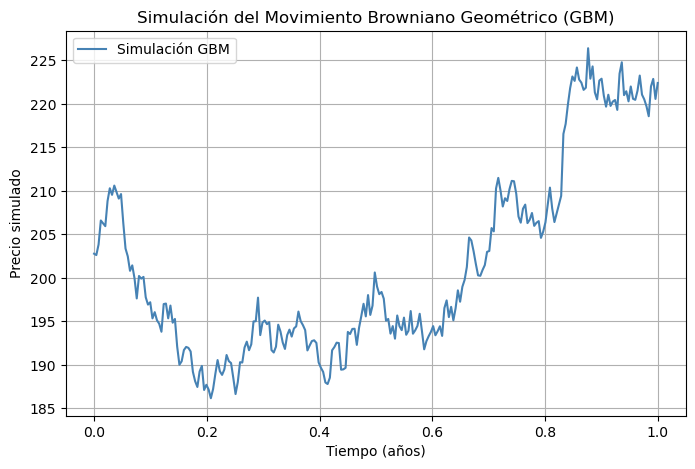

Resultados de la simulación del GBM:
Precio inicial: 201.93
Precio final simulado: 222.41
Rendimiento anual simulado: 10.14 %
Volatilidad anual simulada: 13.17 %


In [ ]:
# @title EJEMPLO de Simulación del modelo GBM (Movimiento Browniano Geométrico)

# Parámetros (puedes usar los del portafolio o de un activo específico)
S0 = 201.93       # Precio inicial simulado
mu = 0.114     # Rendimiento anual esperado (por ejemplo, 11.4%)
sigma = 0.136  # Volatilidad anual (13.6%)
T = 1          # Horizonte en años
N = 252        # Número de días (un año bursátil)
dt = T / N     # Paso temporal

# --- Simulación del movimiento browniano geométrico ---
np.random.seed(42)                         # Reproducibilidad
W = np.random.standard_normal(size=N)      # Proceso de Wiener
W = np.cumsum(W) * np.sqrt(dt)             # Trayectoria acumulada
t = np.linspace(0, T, N)                   # Eje temporal

# Ecuación del GBM
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# --- Cálculos adicionales para interpretar la simulación ---
rend_diario = np.diff(S) / S[:-1]
rend_anual_sim = (S[-1] / S0 - 1) * 100
vol_anual_sim = np.std(rend_diario) * np.sqrt(252) * 100

# --- Gráfico de la trayectoria simulada ---
plt.figure(figsize=(8, 5))
plt.plot(t, S, label="Simulación GBM", color="steelblue")
plt.title("Simulación del Movimiento Browniano Geométrico (GBM)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Precio simulado")
plt.legend()
plt.grid(True)
plt.show()

# --- Resultados numéricos ---
print("Resultados de la simulación del GBM:")
print(f"Precio inicial: {S0:.2f}")
print(f"Precio final simulado: {S[-1]:.2f}")
print(f"Rendimiento anual simulado: {rend_anual_sim:.2f} %")
print(f"Volatilidad anual simulada: {vol_anual_sim:.2f} %")


Usamos estimaciones de rendimiento y volatilidad anuales para simular trayectorias teóricas de precios bajo el modelo GBM y compararlas con los precios reales.


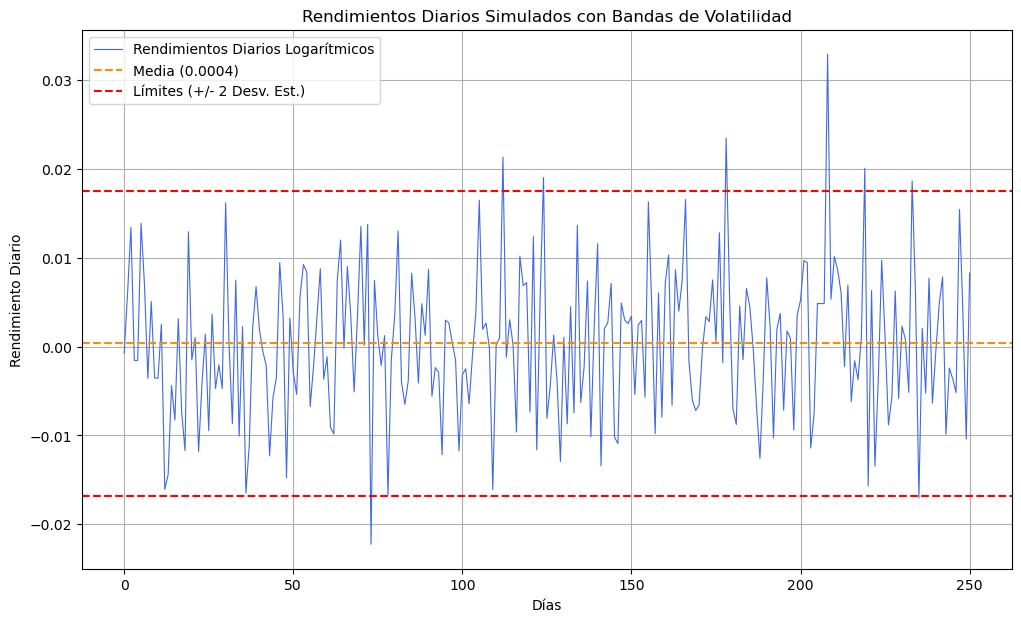

Desviación estándar diaria teórica: 0.0086
Límite superior (Media + 2*DE): 0.0175
Límite inferior (Media - 2*DE): -0.0168


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parámetros ---
S0 = 201.93
mu = 0.114
sigma = 0.136
T = 1
N = 252
dt = T / N

# --- Simulación de Euler-Maruyama ---
np.random.seed(42)
S = np.zeros(N)
S[0] = S0
Z = np.random.standard_normal(N)
for t in range(1, N):
    S[t] = S[t-1] + mu * S[t-1] * dt + sigma * S[t-1] * np.sqrt(dt) * Z[t]

# --- Cálculo de rendimientos logarítmicos diarios ---
log_returns = np.log(S[1:] / S[:-1])

# --- GRÁFICA DE RENDIMIENTOS DIARIOS CON BANDAS DE VOLATILIDAD ---
plt.style.use('default')
plt.figure(figsize=(12, 7))

# Graficamos los rendimientos
plt.plot(log_returns, label="Rendimientos Diarios Logarítmicos", color='royalblue', linewidth=0.8)

# Calculamos la media y la desviación estándar DIARIA
mean_returns = np.mean(log_returns)
daily_std = sigma * np.sqrt(dt) # Desv. Est. teórica diaria

# Dibujamos la línea de la media
plt.axhline(y=mean_returns, color='darkorange', linestyle='--', label=f"Media ({mean_returns:.4f})")

# Calculamos y dibujamos las bandas de control (+/- 2 Desv. Est.)
upper_band = mean_returns + 2 * daily_std
lower_band = mean_returns - 2 * daily_std

plt.axhline(y=upper_band, color='red', linestyle='--', label=f'Límites (+/- 2 Desv. Est.)')
plt.axhline(y=lower_band, color='red', linestyle='--')


# --- Títulos y formato ---
plt.title("Rendimientos Diarios Simulados con Bandas de Volatilidad")
plt.xlabel("Días")
plt.ylabel("Rendimiento Diario")
plt.legend()
plt.grid(True)
plt.show()

print(f"Desviación estándar diaria teórica: {daily_std:.4f}")
print(f"Límite superior (Media + 2*DE): {upper_band:.4f}")
print(f"Límite inferior (Media - 2*DE): {lower_band:.4f}")

# Entrega 4

### Rebalanceo

In [ ]:
# Lista de tickers
tickers = [
    "LMT","TXN", "ADP","WM","PG","PEP"
]

# Fechas elegidas por el usuario
start_date = '2022-09-08'  # @param {type:"date"}
end_date   = '2025-11-03'  # @param {type:"date"}

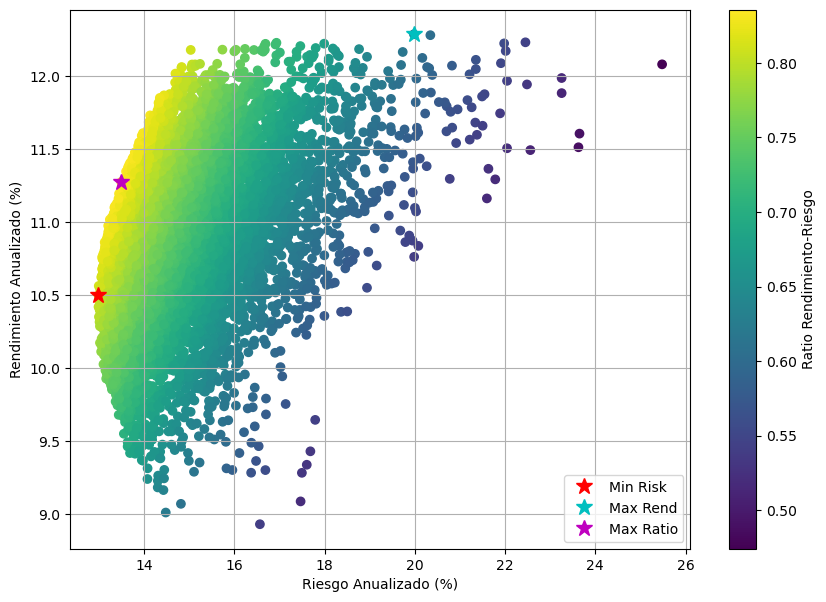


RESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)
Rendimiento anual: 10.499 %; Riesgo anual: 12.988 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.24655014 0.35796586 0.15956617 0.168765   0.06715283]

RESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)
Rendimiento anual: 12.285 %; Riesgo anual: 19.978 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.40170179 0.01550962 0.04380096 0.01355797 0.52542966]

RESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)
Rendimiento anual: 11.274 %; Riesgo anual: 13.491 %
['WM', 'PG', 'ADP', 'LMT', 'TXN']
Pesos de los activos: [0.38488873 0.23539801 0.21964752 0.07494727 0.08511848]


In [ ]:
n_simulaciones = 10000 # @param {type:"integer"}

tickers=[ticker1, ticker2, ticker3,ticker4,ticker5]

# Inicializamos las simulaciones
X = np.random.rand(n_simulaciones, 5)
X = X / X.sum(axis=1)[:, None]  # normalizamos filas para que los pesos sumen 1

Rend_p = np.zeros((n_simulaciones, 1))
Risk_p = np.zeros((n_simulaciones, 1))

# Simulaciones de rendimientos y riesgos
for k in range(n_simulaciones):
    Rend_p[k, :] = np.dot(X[k, :], R.T)  # Rendimiento esperado (promedio diario)
    Risk_p[k, :] = np.sqrt(np.dot(np.dot(X[k, :], covar), X[k, :].T))  # Riesgo (desv. estándar)

# Crear el DataFrame de los portafolios
Portfolios = pd.DataFrame()
Portfolios[ticker1] = X[:, 0]
Portfolios[ticker2] = X[:, 1]
Portfolios[ticker3] = X[:, 2]
Portfolios[ticker4] = X[:, 3]
Portfolios[ticker5] = X[:, 4]

Portfolios['Rend'] = Rend_p
Portfolios['Risk'] = Risk_p

# Anualización de rendimientos y riesgos
Portfolios['Rend_Anual'] = (1 + Portfolios['Rend'])**252 - 1
Portfolios['Risk_Anual'] = Portfolios['Risk'] * np.sqrt(252)

# Identificar los portafolios clave
idx_min = np.argmin(Portfolios['Risk_Anual'])  # Menor riesgo anualizado
idx_max = np.argmax(Portfolios['Rend_Anual'])  # Mayor rendimiento anualizado
ratio = Portfolios['Rend_Anual'] / Portfolios['Risk_Anual']
idx_max_ratio = np.argmax(ratio)  # Mejor ratio

# Filtrar portafolios con rendimiento positivo y encontrar el de menor riesgo
tmp = Portfolios[Portfolios['Rend_Anual'] > 0]
idx_min_pos = tmp.index[np.argmin(tmp['Risk_Anual'])]
idx_max_pos = tmp.index[np.argmax(tmp['Rend_Anual'])]
idx_max_ratio_pos = tmp.index[np.argmax(ratio[tmp.index])]

# Visualización de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(Portfolios['Risk_Anual'] * 100, Portfolios['Rend_Anual'] * 100, c=ratio, cmap='viridis')
plt.colorbar(label='Ratio Rendimiento-Riesgo')

# Marcar los portafolios óptimos
plt.plot(Portfolios['Risk_Anual'][idx_min] * 100, Portfolios['Rend_Anual'][idx_min] * 100, 'r*', markersize=12, label='Min Risk')
plt.plot(Portfolios['Risk_Anual'][idx_max] * 100, Portfolios['Rend_Anual'][idx_max] * 100, 'c*', markersize=12, label='Max Rend')
plt.plot(Portfolios['Risk_Anual'][idx_max_ratio] * 100, Portfolios['Rend_Anual'][idx_max_ratio] * 100, 'm*', markersize=12, label='Max Ratio')

plt.xlabel('Riesgo Anualizado (%)')
plt.ylabel('Rendimiento Anualizado (%)')
plt.legend()
plt.grid()
plt.show()

# Resumen anualizado
print('\nRESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_min] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_min] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_min, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MÁXIMO RENDIMIENTO (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

print('\nRESUMEN BÚSQUEDA PORTAFOLIO MAYOR RATIO DE SHARPE (ANUALIZADO)')
print(f'Rendimiento anual: {Portfolios["Rend_Anual"].iloc[idx_max_ratio] * 100:.3f} %; Riesgo anual: {Portfolios["Risk_Anual"].iloc[idx_max_ratio] * 100:.3f} %')
print(tickers)
print(f'Pesos de los activos: {Portfolios.iloc[idx_max_ratio, :5].values}')  # Seleccionar las primeras 5 columnas para los pesos

En conclusión, este segundo rebalanceo muestra cómo, a pesar de que los rendimientos y el riesgo se mantienen relativamente estables entre los diferentes periodos, la composición óptima del portafolio sí va cambiando con el paso del tiempo y las fluctuaciones del mercado. En nuestro primer portafolio inicial, el rendimiento anualizado fue de 11.32% con un riesgo de 13.53%, mientras que en el primer rebalanceo (un mes después, el 14 de octubre) obtuvimos un rendimiento anual de 11.229% y un riesgo anualizado de 13.433%. Finalmente, en este segundo rebalanceo (3 de noviembre, dos meses después de haber creado el portafolio inicial) obtuvimos un rendimiento anualizado de 11.308% con un riesgo de 13.544%. Aunque los indicadores de performance se mantienen muy cercanos entre sí, la distribución óptima se va ajustando para adaptarse a los cambios recientes en los precios relativos de los activos.

En este último rebalanceo se observa claramente el movimiento más significativo en términos de pesos: PG pierde alrededor de 4% de asignación, mientras que ADP, LMT y TXM aumentan su participación. Esto ilustra que el rebalanceo no solo sirve para mantener la estructura estable del portafolio, sino también para aprovechar desviaciones y cambios relativos entre los activos, moviendo capital desde los instrumentos que se valoran relativamente más hacia aquellos que se vuelven relativamente más atractivos en el nuevo periodo.

Por lo tanto, este ejercicio evidencia que el rebalanceo es una herramienta esencial para mantener disciplina en la gestión de portafolios, prevenir que la concentración en algunos activos aumente de forma pasiva y garantizar que el portafolio continúe reflejando el equilibrio óptimo entre riesgo y rendimiento a lo largo del tiempo.


In [ ]:
ticker_alias = {
    'WM':  'A',
    'PG':  'B',
    'ADP': 'C',
    'LMT': 'D',
    'TXN': 'E',
}

tickers_portfolios = ['WM','PG','ADP','LMT','TXN']
cols_returns       = ['A','B','C','D','E']


In [ ]:
# Toma los pesos del portafolio Max Sharpe usando las etiquetas del Portfolios
w_max_series = pd.Series(Portfolios.loc[idx_max_ratio, tickers_portfolios].to_numpy(float),
                         index=tickers_portfolios)

# Normaliza solo si la suma se desvió
if abs(w_max_series.sum() - 1.0) > 1e-6:
    w_max_series = w_max_series / w_max_series.sum()

print("Pesos segun Portfolios (tickers reales):")
print(w_max_series.round(6))
print("Suma:", w_max_series.sum())


Pesos segun Portfolios (tickers reales):
WM    0.384889
PG    0.235398
ADP   0.219648
LMT   0.074947
TXN   0.085118
dtype: float64
Suma: 1.0


In [ ]:
w_aligned = (w_max_series
             .rename(index=ticker_alias)           # WM→A, PG→B, ...
             .reindex(cols_returns)                # en el orden de asset_returns
            )

# Fix: Define asset_returns from the existing daily_returns and rename columns
asset_returns = daily_returns.rename(columns=ticker_alias)

# Verificaciones
print("\nPesos alineados a columnas de asset_returns:")
print(w_aligned.round(6))
print("Suma (debe ~1):", w_aligned.sum())

# Serie de retornos diarios del portafolio
returns = (asset_returns[cols_returns].to_numpy() @ w_aligned.to_numpy())
returns = pd.Series(returns, index=asset_returns.index, name="Portfolio_Returns")

print("\nSerie 'returns' creada.")
print("Observaciones:", len(returns))
print("Media diaria:", returns.mean())
print("DesvEst diaria:", returns.std())


Pesos alineados a columnas de asset_returns:
A   0.384889
B   0.235398
C   0.219648
D   0.074947
E   0.085118
dtype: float64
Suma (debe ~1): 1.0

Serie 'returns' creada.
Observaciones: 750
Media diaria: 0.0004107813915590331
DesvEst diaria: 0.008500491313776434


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch

print("\n=== PRUEBA ADF (estacionariedad) ===")
adf_result = adfuller(returns.dropna())
print(f"ADF stat: {adf_result[0]:.4f} | p-valor: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("→ Rechazamos H0: la serie parece ESTACIONARIA.")
else:
    print("→ No rechazamos H0: la serie parece NO estacionaria.")

print("\n=== Engle ARCH LM (heterocedasticidad condicional) ===")
for lags in (1, 5):
    lm_stat, lm_p, f_stat, f_p = het_arch(returns.dropna().values, nlags=lags)
    print(f"Lags={lags} → LM={lm_stat:.4f}, p={lm_p:.4f} | F={f_stat:.4f}, p={f_p:.4f}")
    if lm_p < 0.05:
        print("  → Rechazamos H0: HAY heterocedasticidad condicional.")
    else:
        print("  → No rechazamos H0: NO hay evidencia de heterocedasticidad.")



=== PRUEBA ADF (estacionariedad) ===
ADF stat: -9.8106 | p-valor: 0.0000
→ Rechazamos H0: la serie parece ESTACIONARIA.

=== Engle ARCH LM (heterocedasticidad condicional) ===
Lags=1 → LM=4.1474, p=0.0417 | F=4.1594, p=0.0418
  → Rechazamos H0: HAY heterocedasticidad condicional.
Lags=5 → LM=91.2718, p=0.0000 | F=20.6354, p=0.0000
  → Rechazamos H0: HAY heterocedasticidad condicional.


In [ ]:
from scipy import stats
from arch import arch_model

alpha = 0.05
results = []

def test_model(name, model):
    res = model.fit(disp='off')
    # Normalidad de residuos estandarizados
    jb_stat, jb_p = stats.jarque_bera(res.std_resid)
    sw_stat, sw_p = stats.shapiro(res.std_resid)

    residuos_normales = (jb_p >= alpha) and (sw_p >= alpha)

    print(f"\n{name}")
    print(f"AIC: {res.aic:.2f} | BIC: {res.bic:.2f}")
    print(f"Jarque–Bera p: {jb_p:.4f} | Shapiro–Wilk p: {sw_p:.4f}")
    print(f"¿Residuos normales (α={alpha})?: {residuos_normales}")

    results.append([name, res.aic, res.bic, jb_p, sw_p, residuos_normales])

# Escalar a % (suele ayudar a la convergencia)
y = returns.dropna().values * 100.0

# ARCH(p), p=1..5
for p in range(1, 6):
    am = arch_model(y, mean='constant', vol='ARCH', p=p)
    test_model(f"ARCH({p})", am)

# GARCH(p,q)
for p,q in [(1,1),(1,2),(2,1),(2,2)]:
    gm = arch_model(y, mean='constant', vol='GARCH', p=p, q=q)
    test_model(f"GARCH({p},{q})", gm)

# Tabla final
df_models = pd.DataFrame(results, columns=['modelo','AIC','BIC','JB_p','SW_p','residuos_normales'])
print("\n================ TABLA FINAL =================")
print(df_models.sort_values(['residuos_normales','AIC'], ascending=[False, True]).to_string(index=False))

# Mejor modelo: mínimo AIC entre los que tienen residuos normales
df_valid = df_models[df_models['residuos_normales']]
if len(df_valid) > 0:
    best = df_valid.loc[df_valid['AIC'].idxmin()]
    print("\n>>> MEJOR MODELO (criterio: residuos normales y menor AIC):")
    print(best.to_string())
else:
    # si ninguno tiene residuos normales, tomar mínimo AIC global e indicar que no son normales
    best = df_models.loc[df_models['AIC'].idxmin()]
    print("\n>>> MEJOR MODELO por AIC (ninguno con residuos normales):")
    print(best.to_string())
    print("Aviso: los residuos del mejor AIC NO pasan normalidad (JB y/o SW).")



ARCH(1)
AIC: 1871.73 | BIC: 1885.59
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

ARCH(2)
AIC: 1854.65 | BIC: 1873.13
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

ARCH(3)
AIC: 1842.25 | BIC: 1865.35
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

ARCH(4)
AIC: 1826.90 | BIC: 1854.62
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

ARCH(5)
AIC: 1826.85 | BIC: 1859.19
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

GARCH(1,1)
AIC: 1814.87 | BIC: 1833.35
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

GARCH(1,2)
AIC: 1816.87 | BIC: 1839.97
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

GARCH(2,1)
AIC: 1816.65 | BIC: 1839.75
Jarque–Bera p: 0.0000 | Shapiro–Wilk p: 0.0000
¿Residuos normales (α=0.05)?: False

GARCH(2,2)
AIC: 1818.51 | BIC:

--- Cálculo del VaR (Simulación Histórica) ---
Modelo Seleccionado: GARCH(1,1)

Media pronosticada (t+1, %): 0.0462
Volatilidad pronosticada (t+1, %): 0.7150
------------------------------
Cuantil 5.0% (Z-score empírico): -1.6208
VaR (95%) a 1 día (decimal): -0.0111
Esto significa una pérdida máxima esperada de -1.11% con un 95% de confianza.
------------------------------
Cuantil 1.0% (Z-score empírico): -2.4512
VaR (99%) a 1 día (decimal): -0.0171
Esto significa una pérdida máxima esperada de -1.71% con un 99% de confianza.


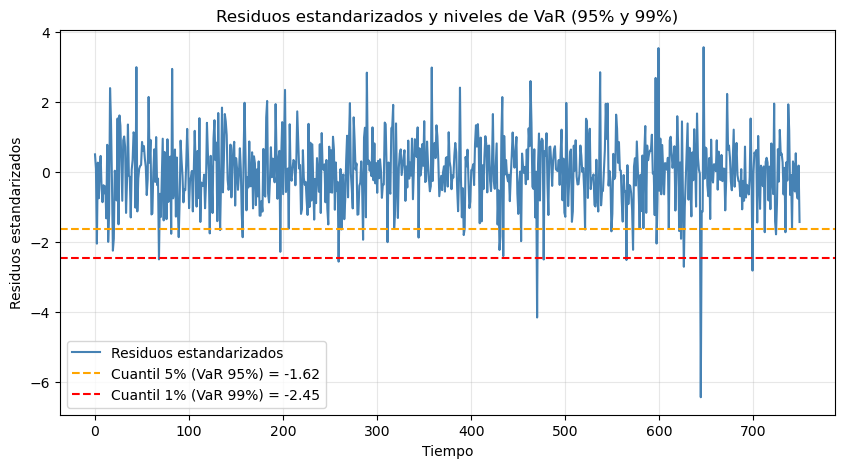

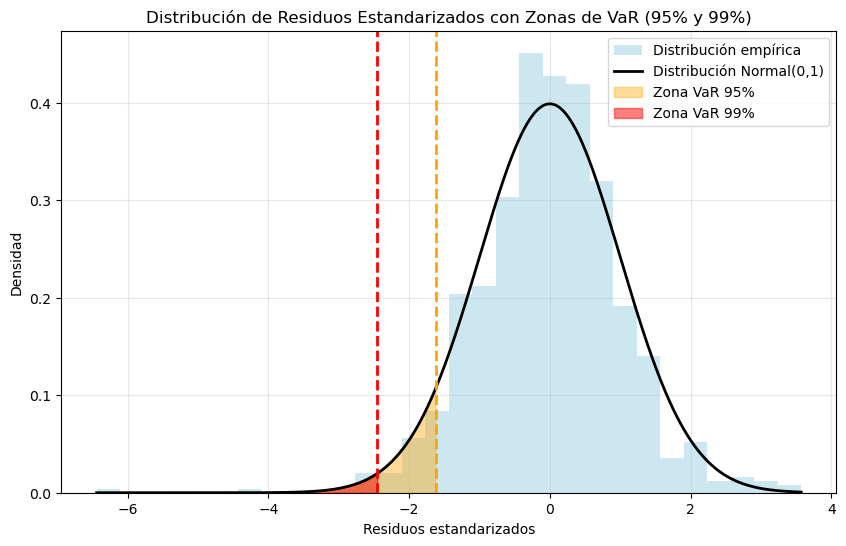

In [ ]:
import numpy as np
import scipy.stats as stats
from arch import arch_model
import matplotlib.pyplot as plt  # <-- agregado solo para graficar

model_garch_1_1 = arch_model(y, vol='Garch', p=1, q=1)
model_fit = model_garch_1_1.fit(disp='off')

std_resid = model_fit.std_resid

forecasts = model_fit.forecast(start=None, horizon=1)

cond_mean_forecast = forecasts.mean['h.1'].iloc[-1]
cond_var_forecast = forecasts.variance['h.1'].iloc[-1]
cond_vol_forecast = np.sqrt(cond_var_forecast)

# Calcular los cuantiles (Z-score) de la simulación histórica filtrada
alpha_99 = 0.01
alpha_95 = 0.05
q_99 = np.quantile(std_resid, alpha_99)
q_95 = np.quantile(std_resid, alpha_95)

# Calcular el VaR (en porcentaje)
VaR_99_pct = cond_mean_forecast + cond_vol_forecast * q_99
VaR_95_pct = cond_mean_forecast + cond_vol_forecast * q_95

# Convertir el VaR a formato decimal (dividiendo por 100)
VaR_99_decimal = VaR_99_pct / 100
VaR_95_decimal = VaR_95_pct / 100

print("--- Cálculo del VaR (Simulación Histórica) ---")
print(f"Modelo Seleccionado: GARCH(1,1)")
print(f"\nMedia pronosticada (t+1, %): {cond_mean_forecast:.4f}")
print(f"Volatilidad pronosticada (t+1, %): {cond_vol_forecast:.4f}")
print("-" * 30)
print(f"Cuantil {alpha_95*100}% (Z-score empírico): {q_95:.4f}")
print(f"VaR (95%) a 1 día (decimal): {VaR_95_decimal:.4f}")
print(f"Esto significa una pérdida máxima esperada de {VaR_95_decimal*100:.2f}% con un 95% de confianza.")
print("-" * 30)
print(f"Cuantil {alpha_99*100}% (Z-score empírico): {q_99:.4f}")
print(f"VaR (99%) a 1 día (decimal): {VaR_99_decimal:.4f}")
print(f"Esto significa una pérdida máxima esperada de {VaR_99_decimal*100:.2f}% con un 99% de confianza.")


# GRAFICA 1: Residuos estandarizados y cuantiles


plt.figure(figsize=(10, 5))
plt.plot(std_resid, color='steelblue', label='Residuos estandarizados')
plt.axhline(q_95, color='orange', linestyle='--', label=f'Cuantil 5% (VaR 95%) = {q_95:.2f}')
plt.axhline(q_99, color='red', linestyle='--', label=f'Cuantil 1% (VaR 99%) = {q_99:.2f}')
plt.title('Residuos estandarizados y niveles de VaR (95% y 99%)')
plt.xlabel('Tiempo')
plt.ylabel('Residuos estandarizados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# GRAFICA 2: Distribución (tipo campana) con VaR


plt.figure(figsize=(10,6))

# Histograma de los residuos estandarizados
count, bins, ignored = plt.hist(std_resid, bins=30, density=True, color='lightblue', alpha=0.6, label='Distribución empírica')

# Curva normal teórica
x = np.linspace(min(std_resid), max(std_resid), 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'k-', lw=2, label='Distribución Normal(0,1)')

# Sombras de las zonas de VaR
plt.fill_between(x, 0, stats.norm.pdf(x, 0, 1), where=(x < q_95), color='orange', alpha=0.4, label='Zona VaR 95%')
plt.fill_between(x, 0, stats.norm.pdf(x, 0, 1), where=(x < q_99), color='red', alpha=0.5, label='Zona VaR 99%')

# Líneas verticales
plt.axvline(q_95, color='orange', linestyle='--', linewidth=2)
plt.axvline(q_99, color='red', linestyle='--', linewidth=2)

plt.title('Distribución de Residuos Estandarizados con Zonas de VaR (95% y 99%)')
plt.xlabel('Residuos estandarizados')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Empleando el modelo GARCH(1,1), seleccionado como óptimo mediante los criterios de información, se estimó la varianza condicional para el cálculo del Valor en Riesgo (VaR). Los resultados, obtenidos por Simulación Histórica Filtrada (FHS), sitúan el VaR a 1 día con un 95% de confianza en -0.0111, lo que implica una pérdida máxima esperada del 1.11%

# Conclusión
En conclusión, aunque ninguno de los modelos evaluados (ARCH ni GARCH) logró generar residuos compatibles con normalidad (p-values < 0.05 en Jarque–Bera y Shapiro–Wilk), sí es posible seleccionar un modelo basándonos en criterios de información. En este caso, el modelo con el AIC más bajo fue GARCH(1,1), lo que indica que es la especificación que mejor balancea ajuste y complejidad entre todas las alternativas probadas. Por lo tanto, aunque no cumple con el supuesto de normalidad en los residuos, el GARCH(1,1) sigue siendo el mejor candidato dentro del conjunto de modelos estimados, ya que minimiza el AIC y captura adecuadamente la heterocedasticidad condicional presente en la serie. Aprovechando este modelo para una aplicación de gestión de riesgos, se procedió a la estimación del Valor en Riesgo (VaR). Precisamente porque los residuos no son normales, se empleó el método de Simulación Histórica Filtrada (FHS), el cual utiliza la distribución empírica de los propios residuos en lugar de asumir una distribución teórica. La estimación del VaR, basada en la varianza pronosticada por el modelo GARCH(1,1), indica que la pérdida máxima esperada para un horizonte de 1 día, con un 95% de confianza, es de -0.0111 (1.11%).

# ENTREGA 5

## Ratio de Sharpe

In [ ]:
tickers = ["LMT","TXN","ADP","WM","PG","PEP"]

start_date = '2022-09-08'
end_date   = '2025-11-20'

n_simulaciones = 100000

# ================================
# DESCARGA DE DATOS
# ================================
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Rendimientos diarios
returns = data.pct_change().dropna()

# Promedio y covarianza
R = returns.mean().values
covar = returns.cov().values

# ================================
# SIMULACIÓN DE PORTAFOLIOS
# ================================
X = np.random.rand(n_simulaciones, len(tickers))
X = X / X.sum(axis=1)[:, None]

Rend_p = X @ R
Risk_p = np.sqrt(np.einsum("ij,jk,ik->i", X, covar, X))

Portfolios = pd.DataFrame(X, columns=tickers)
Portfolios["Rend"] = Rend_p
Portfolios["Risk"] = Risk_p

# ================================
# ANUALIZACIÓN
# ================================
Portfolios["Rend_Anual"] = (1 + Portfolios["Rend"])**252 - 1
Portfolios["Risk_Anual"] = Portfolios["Risk"] * np.sqrt(252)

# ================================
# SHARPE RATIO
# ================================
Portfolios["Sharpe"] = Portfolios["Rend_Anual"] / Portfolios["Risk_Anual"]

# Ordenar
df_sharpe = Portfolios.copy()
df_sharpe["Rend_Anual (%)"] = df_sharpe["Rend_Anual"] * 100
df_sharpe["Risk_Anual (%)"] = df_sharpe["Risk_Anual"] * 100

df_sharpe = df_sharpe.sort_values(by="Sharpe", ascending=False)

cols_show = tickers + ["Rend_Anual (%)","Risk_Anual (%)","Sharpe"]

print("\nTOP 5 PORTAFOLIOS POR SHARPE RATIO")
df_sharpe[cols_show].head(5)


/tmp/ipython-input-3108007420.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  6 of 6 completed



TOP 5 PORTAFOLIOS POR SHARPE RATIO


,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Sharpe
55065,0.000454,0.329333,0.000342,0.219083,0.030004,0.420784,8.637448,13.836818,0.624237
52562,0.012863,0.278840,0.003679,0.217161,0.074022,0.413436,8.419871,13.518525,0.622839
45862,0.037714,0.336187,0.003369,0.191556,0.013199,0.417975,8.591335,13.882860,0.618845
56825,0.008762,0.307143,0.015271,0.237417,0.028762,0.402645,8.399898,13.617599,0.616841
13262,0.035044,0.181614,0.002720,0.213185,0.040500,0.526937,8.518422,13.810228,0.616820


## Ratio de Sortino

In [ ]:
# Tasa libre de riesgo anualizada (CETES 1 año)
rf = 0.0783  # 7.83% anual

# Inicializamos las simulaciones
X = np.random.rand(n_simulaciones, len(tickers))
X = X / X.sum(axis=1)[:, None]  # normalizar filas (pesos)

Rend_p = np.zeros((n_simulaciones, 1))
Risk_p = np.zeros((n_simulaciones, 1))

# Simulaciones de rendimientos y riesgos
for k in range(n_simulaciones):
    Rend_p[k, :] = np.dot(X[k, :], R.T)
    Risk_p[k, :] = np.sqrt(np.dot(np.dot(X[k, :], covar), X[k, :].T))

# Función para downside deviation anualizada
def downside_deviation(returns, mar=rf/252):  # MAR = tasa libre de riesgo diaria
    downside_returns = np.minimum(returns - mar, 0)
    return np.sqrt((downside_returns**2).mean()) * np.sqrt(252)

# Rendimientos diarios de activos (ya están en returns)
daily_r = returns.values  # matriz (días x activos)

# Rendimientos diarios de cada portafolio: (días x simulaciones)
portfolios_daily_returns = daily_r @ X.T

# Calcular downside deviation para cada portafolio (anualizada)
downsides = np.array([
    downside_deviation(portfolios_daily_returns[:, i])
    for i in range(n_simulaciones)
])

# Construcción del DataFrame
Portfolios = pd.DataFrame(X, columns=tickers)
Portfolios['Rend'] = Rend_p
Portfolios['Risk'] = Risk_p

Portfolios['Rend_Anual'] = (1 + Portfolios['Rend'])**252 - 1
Portfolios['Risk_Anual'] = Portfolios['Risk'] * np.sqrt(252)

# Ratio de Sortino (anualizado)
Portfolios['Sortino'] = (Portfolios['Rend_Anual'] - rf) / downsides

# Portafolio con máximo Sortino
idx_max_sortino = np.argmax(Portfolios['Sortino'])

# Tabla ordenada
df_sortino = Portfolios.copy()
df_sortino['Rend_Anual (%)'] = df_sortino['Rend_Anual'] * 100
df_sortino['Risk_Anual (%)'] = df_sortino['Risk_Anual'] * 100
df_sortino = df_sortino.sort_values(by='Sortino', ascending=False)

cols_to_show = tickers + ['Rend_Anual (%)', 'Risk_Anual (%)', 'Sortino']

print("\n TOP 5 PORTAFOLIOS POR RATIO DE SORTINO")
display(df_sortino[cols_to_show].head(5))



 TOP 5 PORTAFOLIOS POR RATIO DE SORTINO


,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Sortino
80949,0.078909,0.138708,0.017527,0.013503,0.015416,0.735937,9.003396,15.490367,0.106846
64689,0.039922,0.533501,0.001527,0.058762,0.001863,0.364424,9.010673,15.527324,0.105415
14363,0.032863,0.132417,0.005101,0.161130,0.013754,0.654735,8.818463,14.679919,0.094921
29992,0.024263,0.356427,0.000085,0.151056,0.031595,0.436573,8.754039,14.094482,0.091950
50873,0.039278,0.224832,0.010024,0.110857,0.044869,0.570140,8.754389,14.238418,0.091706


## Ratio de Treynor

In [ ]:
# Descarga índice de mercado
market_ticker = "^GSPC"

market_data = yf.download(market_ticker, start=start_date, end=end_date)['Close']
market_returns = market_data.pct_change().dropna()

# Alinear fechas con los retornos de tus activos
aligned_market = market_returns.loc[returns.index]

# Beta de cada portafolio
# matriz (días x portafolios)
portfolios_daily_returns = returns.values @ X.T

betas = []

for i in range(n_simulaciones):
    cov_pm = np.cov(portfolios_daily_returns[:, i], aligned_market.values.flatten())[0, 1]
    var_m  = np.var(aligned_market.values)
    betas.append(cov_pm / var_m)

betas = np.array(betas)

# Ratio de Treynor
Portfolios["Treynor"] = (Portfolios["Rend_Anual"] - rf) / betas

# Ordenar para ver los mejores
df_treynor = Portfolios.copy()
df_treynor["Rend_Anual (%)"] = df_treynor["Rend_Anual"] * 100
df_treynor["Risk_Anual (%)"] = df_treynor["Risk_Anual"] * 100
df_treynor["Beta"] = betas

df_treynor = df_treynor.sort_values(by="Treynor", ascending=False)

cols_show = tickers + ["Rend_Anual (%)", "Risk_Anual (%)", "Beta", "Treynor"]

print("\n TOP 5 PORTAFOLIOS POR RATIO DE TREYNOR")
display(df_treynor[cols_show].head(5))


/tmp/ipython-input-2059149047.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download(market_ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed



 TOP 5 PORTAFOLIOS POR RATIO DE TREYNOR


,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Beta,Treynor
64689,0.039922,0.533501,0.001527,0.058762,0.001863,0.364424,9.010673,15.527324,0.296434,0.039829
80949,0.078909,0.138708,0.017527,0.013503,0.015416,0.735937,9.003396,15.490367,0.354964,0.033057
14363,0.032863,0.132417,0.005101,0.161130,0.013754,0.654735,8.818463,14.679919,0.329915,0.029961
29992,0.024263,0.356427,0.000085,0.151056,0.031595,0.436573,8.754039,14.094482,0.327721,0.028196
49034,0.013516,0.291207,0.018148,0.171415,0.007815,0.497899,8.672807,14.066095,0.303624,0.027758


## Information ratio

In [ ]:
# Benchmark
benchmark_ticker = "^GSPC"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Close']

# Retornos diarios del benchmark
benchmark_returns = benchmark_data.pct_change().dropna()

# Alinear las fechas con tus retornos
aligned_benchmark = benchmark_returns.loc[returns.index].values.flatten()

# ====== TRACKING ERROR ======
# Rendimientos diarios de portafolios simulados (días x portafolios)
portfolios_daily_returns = returns.values @ X.T

# Tracking error anualizado para cada portafolio
tracking_errors = []

for i in range(n_simulaciones):
    active_returns = portfolios_daily_returns[:, i] - aligned_benchmark
    te = active_returns.std() * np.sqrt(252)   # annualized TE
    tracking_errors.append(te)

tracking_errors = np.array(tracking_errors)

# ====== RENDIMIENTO ANUAL DEL BENCHMARK ======
Rb_annual = (1 + aligned_benchmark.mean())**252 - 1

# ====== INFORMATION RATIO ======
Portfolios["Information_Ratio"] = (Portfolios["Rend_Anual"] - Rb_annual) / tracking_errors

# ====== TABLA ORDENADA ======
df_ir = Portfolios.copy()

df_ir["Rend_Anual (%)"] = df_ir["Rend_Anual"] * 100
df_ir["Risk_Anual (%)"] = df_ir["Risk_Anual"] * 100
df_ir["Tracking_Error"] = tracking_errors

df_ir = df_ir.sort_values(by="Information_Ratio", ascending=False)

cols_show = tickers + ["Rend_Anual (%)", "Risk_Anual (%)", "Tracking_Error", "Information_Ratio"]

print("\n TOP 5 PORTAFOLIOS POR INFORMATION RATIO")
display(df_ir[cols_show].head(5))


/tmp/ipython-input-1653446808.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed



 TOP 5 PORTAFOLIOS POR INFORMATION RATIO


,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Tracking_Error,Information_Ratio
3413,0.009168,0.737616,0.043699,0.083423,0.012032,0.114062,8.488356,17.521846,0.207078,-0.491766
1173,0.067119,0.736864,0.011793,0.004399,0.068497,0.111328,8.617896,17.643951,0.197182,-0.509878
64689,0.039922,0.533501,0.001527,0.058762,0.001863,0.364424,9.010673,15.527324,0.187463,-0.515359
46930,0.044526,0.770467,0.113158,0.004815,0.026487,0.040547,7.841012,18.068810,0.208683,-0.519006
39275,0.176604,0.739450,0.014813,0.056099,0.002381,0.010653,8.135419,17.797406,0.202154,-0.521205


## Evolución del portafolio

In [ ]:
# @title Sharpe

df_sharpe = pd.DataFrame({
    "Fecha": ["2025-09-08","2025-10-08","2025-11-08","2025-11-20"],
    "LMT": [0.206123,0.209529,0.045102,0.000454],
    "TXN": [0.112823,0.258183,0.297504,0.329333],
    "ADP": [0.000108,0.000678,0.00326,0.000342],
    "WM":  [0.237689,0.163075,0.238681,0.219083],
    "PG":  [0.097264,0.082263,0.053214,0.030004],
    "PEP": [0.345993,0.286272,0.362239,0.420784],
    "Rend_Anual (%)": [10.803972,10.591324,7.462451,8.637448],
    "Risk_Anual (%)": [13.342095,13.319514,13.372841,13.836818],
    "Sharpe": [0.809766,0.795173,0.558030,0.624237]
})
df_sharpe

,Fecha,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Sharpe
0,2025-09-08,0.206123,0.112823,0.000108,0.237689,0.097264,0.345993,10.803972,13.342095,0.809766
1,2025-10-08,0.209529,0.258183,0.000678,0.163075,0.082263,0.286272,10.591324,13.319514,0.795173
2,2025-11-08,0.045102,0.297504,0.003260,0.238681,0.053214,0.362239,7.462451,13.372841,0.558030
3,2025-11-20,0.000454,0.329333,0.000342,0.219083,0.030004,0.420784,8.637448,13.836818,0.624237


In [ ]:
# @title Sortino

df_sortino = pd.DataFrame({
    "Fecha": ["2025-09-08","2025-10-08","2025-11-08","2025-11-20"],
    "LMT": [0.284044,0.177131,0.02212,0.078909],
    "TXN": [0.000312,0.391143,0.483198,0.138708],
    "ADP": [0.000986,0.007125,0.004142,0.017527],
    "WM":  [0.033733,0.01,0.029009,0.013503],
    "PG":  [0.230931,0.037856,0.029354,0.015416],
    "PEP": [0.449994,0.376745,0.432176,0.735937],
    "Rend_Anual (%)": [11.669421,11.269553,7.938133,9.003396],
    "Risk_Anual (%)": [15.752261,14.437156,15.274074,15.490367],
    "Sortino": [0.351442,0.335223,0.009836,0.106846]
})
df_sortino

,Fecha,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Sortino
0,2025-09-08,0.284044,0.000312,0.000986,0.033733,0.230931,0.449994,11.669421,15.752261,0.351442
1,2025-10-08,0.177131,0.391143,0.007125,0.010000,0.037856,0.376745,11.269553,14.437156,0.335223
2,2025-11-08,0.022120,0.483198,0.004142,0.029009,0.029354,0.432176,7.938133,15.274074,0.009836
3,2025-11-20,0.078909,0.138708,0.017527,0.013503,0.015416,0.735937,9.003396,15.490367,0.106846


In [ ]:
# @title Treynor

df_treynor = pd.DataFrame({
    "Fecha": ["2025-09-08","2025-10-08","2025-11-08","2025-11-20"],
    "LMT": [0.080836,0.067086,0.02212,0.039922],
    "TXN": [0.161509,0.574472,0.483198,0.533501],
    "ADP": [0.001559,0.002251,0.004142,0.001527],
    "WM":  [0.022265,0.005984,0.029009,0.058762],
    "PG":  [0.034653,0.002911,0.029354,0.001863],
    "PEP": [0.699178,0.347297,0.432176,0.364424],
    "Rend_Anual (%)": [11.146637,11.606892,7.938133,9.010673],
    "Risk_Anual (%)": [15.183986,16.025589,15.274074,15.527324],
    "Treynor": [0.084658,0.11822,0.003304,0.039829]
})
df_treynor

,Fecha,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Treynor
0,2025-09-08,0.080836,0.161509,0.001559,0.022265,0.034653,0.699178,11.146637,15.183986,0.084658
1,2025-10-08,0.067086,0.574472,0.002251,0.005984,0.002911,0.347297,11.606892,16.025589,0.118220
2,2025-11-08,0.022120,0.483198,0.004142,0.029009,0.029354,0.432176,7.938133,15.274074,0.003304
3,2025-11-20,0.039922,0.533501,0.001527,0.058762,0.001863,0.364424,9.010673,15.527324,0.039829


In [ ]:
# @title Information

df_information = pd.DataFrame({
    "Fecha": ["2025-09-08","2025-10-08","2025-11-08","2025-11-20"],
    "LMT": [0.107299,0.067086,0.076813,0.009168],
    "TXN": [0.014794,0.574472,0.750367,0.737616],
    "ADP": [0.020181,0.002251,0.016149,0.043699],
    "WM":  [0.009783,0.005984,0.065725,0.083423],
    "PG":  [0.762717,0.002911,0.08184,0.012032],
    "PEP": [0.085227,0.347297,0.009106,0.114062],
    "Rend_Anual (%)": [11.896487,11.606892,7.477902,8.488356],
    "Risk_Anual (%)": [25.671589,16.025589,17.807133,17.521846],
    "Information": [-0.40755,-0.444322,-0.610929,-0.491766]
})
df_information

,Fecha,LMT,TXN,ADP,WM,PG,PEP,Rend_Anual (%),Risk_Anual (%),Information
0,2025-09-08,0.107299,0.014794,0.020181,0.009783,0.762717,0.085227,11.896487,25.671589,-0.407550
1,2025-10-08,0.067086,0.574472,0.002251,0.005984,0.002911,0.347297,11.606892,16.025589,-0.444322
2,2025-11-08,0.076813,0.750367,0.016149,0.065725,0.081840,0.009106,7.477902,17.807133,-0.610929
3,2025-11-20,0.009168,0.737616,0.043699,0.083423,0.012032,0.114062,8.488356,17.521846,-0.491766


# Comparación con otras opciones de inversión e índice

In [15]:
import pandas as pd
import yfinance as yf
import numpy as np

# Diccionario de activos e índices
activos = {
    'CETES 1 año': 0.0783,        # tasa libre de riesgo
    'S&P500': '^GSPC',
    'Nasdaq': '^IXIC'
}

start_date = '2022-09-08'
end_date   = '2025-11-20'

metrics_indices = []

# Calcular métricas
for name, ticker in activos.items():
    ticker_str = str(ticker)
    if ticker_str.startswith('^'):  # índice
        data = yf.download(ticker_str, start=start_date, end=end_date)['Close']
        returns = data.pct_change().dropna()
        mean_ret = returns.mean() * 252
        vol = returns.std() * np.sqrt(252)
    else:  # CETES
        mean_ret = float(ticker)
        vol = 0.01  # riesgo muy bajo
    metrics_indices.append([name, float(mean_ret*100), float(vol*100)])

# Crear DataFrame índices
df_indices = pd.DataFrame(metrics_indices, columns=['Activo/Índice', 'Rend_Anual (%)', 'Risk_Anual (%)'])

# Añadir tu portafolio Sharpe Max
df_portfolio = pd.DataFrame([['Portafolio Sharpe Max', 8.637448, 13.836818]],
                            columns=['Activo/Índice', 'Rend_Anual (%)', 'Risk_Anual (%)'])

# Concatenar
df_final = pd.concat([df_indices, df_portfolio], ignore_index=True)

# Ordenar por Rend_Anual (%)
df_final = df_final.sort_values(by='Rend_Anual (%)', ascending=False).reset_index(drop=True)

# Mostrar DataFrame final
df_final


/tmp/ipython-input-2138049967.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_str, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2138049967.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  metrics_indices.append([name, float(mean_ret*100), float(vol*100)])
/tmp/ipython-input-2138049967.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_str, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2138049967.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  metrics_indices.append([name, float(mean_ret*100), f

,Activo/Índice,Rend_Anual (%),Risk_Anual (%)
0,Nasdaq,22.522499,21.680785
1,S&P500,17.221412,16.470020
2,Portafolio Sharpe Max,8.637448,13.836818
3,CETES 1 año,7.830000,1.000000


# Evolución de mi inversión

In [16]:
# Acciones y pesos
tickers = ["WM","PG","ADP","LMT","TXN"]
weights = np.array([0.3996, 0.2149, 0.2287, 0.0809, 0.0758])

# Fecha inicial y dinero invertido
start_date = '2025-09-08'  # el día que armaste el portafolio
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
initial_investment = 1000

# Descargar precios
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calcular retornos diarios
returns = data.pct_change().dropna()

# Calcular retornos diarios del portafolio
portfolio_returns = returns.dot(weights)

# Calcular valor del portafolio día a día
portfolio_value = initial_investment * (1 + portfolio_returns).cumprod()

# Valor final
final_value = portfolio_value[-1]

print(f"Valor inicial invertido: ${initial_investment:.2f}")
print(f"Valor actual del portafolio: ${final_value:.2f}")
print(f"Ganancia total: ${final_value - initial_investment:.2f}")
print(f"Retorno total: {((final_value/initial_investment)-1)*100:.2f}%")


/tmp/ipython-input-4251926489.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed

Valor inicial invertido: $1000.00
Valor actual del portafolio: $905.49
Ganancia total: $-94.51
Retorno total: -9.45%



/tmp/ipython-input-4251926489.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_value = portfolio_value[-1]
